### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import math
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [2]:
# Generic formatting to make charts look better

# plot sizes
sns.set(rc = {'figure.figsize':(15,10)})
plt.figure(figsize=(15, 10))

# Set colour palette.
sns.set_palette("tab10")
plt.set_cmap("tab10")

# Set chart background style
sns.set_style('whitegrid') 

# Font size of the axes title.
plt.rc('axes', titlesize=18) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=14)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# Legend font size.
plt.rc('legend', fontsize=13)

# Controls default text sizes.
plt.rc('font', size=13) 

<Figure size 1080x720 with 0 Axes>

In [3]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453   
1     graduate       EN      Web      466   
2     graduate       EN      Web      254   
3     graduate       EN      Web      263   
4     graduate       EN      Web      291   
...        ...      ...      ...      ...   
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 11 columns]

In [4]:
# Any missing values?
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


There are no missing values (shown by 2000 entries in range index and each column showing as 2000 non-null

In [5]:
# Explore the data.
# maybe some box plots? histograms? on numerical
# look at all the entries in the categorical - eg education and that
duplicate_rows = reviews[reviews.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [gender, age, remuneration (k£), spending_score (1-100), loyalty_points, education, language, platform, product, review, summary]
Index: []

There are no duplicated rows

### Exploring the Data - Categorical Columns

In [6]:
# look at the entries and counts in the education column for anything strage
reviews['education'].value_counts()  

graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: education, dtype: int64

In [7]:
# look at the entries and counts in the language column for anything strage
reviews['language'].value_counts() 

EN    2000
Name: language, dtype: int64

In [8]:
# look at the entries and counts in the platform column for anything strage
reviews['platform'].value_counts() 

Web    2000
Name: platform, dtype: int64

In [9]:
# Have a look at a couple of entries in the review and summary columns
reviews_text = reviews[['review', 'summary']]

reviews_text.style.set_properties(subset=['review'], **{'width': '1200px'})

__Conclusion:__ The data in the categorical fields looks fine, there are no erroneous entries in there or values that look like they need to be cleaned. Education looks to have sensible variables and labelled correctly. The review and summary columns look to be free-text fields so would not be practical to check anything, other than they have an entry in which has been done by NaN check. Platform and Language columns both only have a single entry - it is highly likely these columns can be removed as they add not value to the data.

### Exploring the Data - Numerical Columns

In [10]:
# boxplots for numerical columns to review the spread of data. Use a loop to chart all columns

# First set up variables to pass into the function
numerical = ['age', 
             'remuneration (k£)', 
             'spending_score (1-100)', 
             'loyalty_points'] # List of columns from the data to iterate over
rows = math.ceil(len(numerical)/2) # Used to calculate how many columns the subplot needs - count of columns/2 rounded up


# User defined function to plot the chosen series for each province
def plot_boxplots(dataframe):
    plt.figure(figsize=(20, 10)) 
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Numerical Column Box Plots", fontsize=24, y=0.92)
    for n, column in enumerate(numerical): # loop through each column name in the list created
        ax = plt.subplot(rows, 2, n + 1) # add a new subplot iteratively based on total rows required
        sns.boxplot(x = dataframe[column]) # plot the column, use sns as default looks nicer than matplotlib
        ax.set_title(column)
        ax.set_xlabel("")

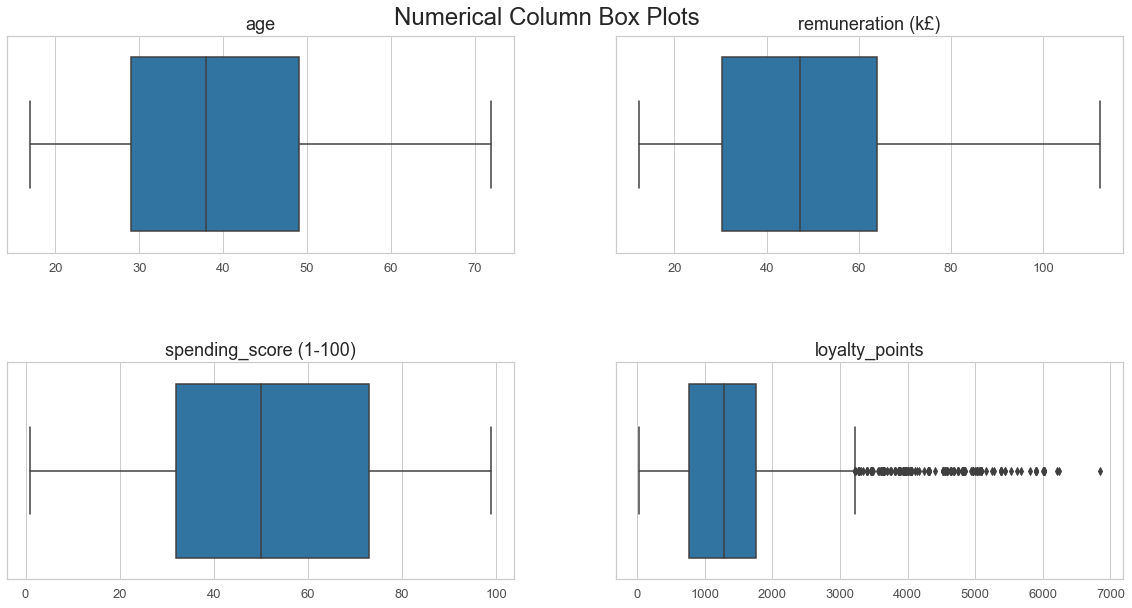

In [11]:
plot_boxplots(reviews)

In [12]:
# boxplots for numerical columns
# Set up variables to pass into the function
numerical = ['age', 'remuneration (k£)', 'spending_score (1-100)', 'loyalty_points'] # List of columns from the data to iterate over
rows = math.ceil(len(numerical)/2) # Used to calculate how many columns the subplot needs - count of columns/2 rounded up


# User defined function to plot the chosen series for each province
def plot_histplots(dataframe):
    plt.figure(figsize=(20, 10))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Numerical Column Histograms", fontsize=24, y=0.92)
    for n, column in enumerate(numerical): # loop through each column in the list
        ax = plt.subplot(rows, 2, n + 1) # add a new subplot iteratively
        sns.histplot(x = dataframe[column], fill=True, kde=True)
        ax.set_title(column)
        ax.set_xlabel("")

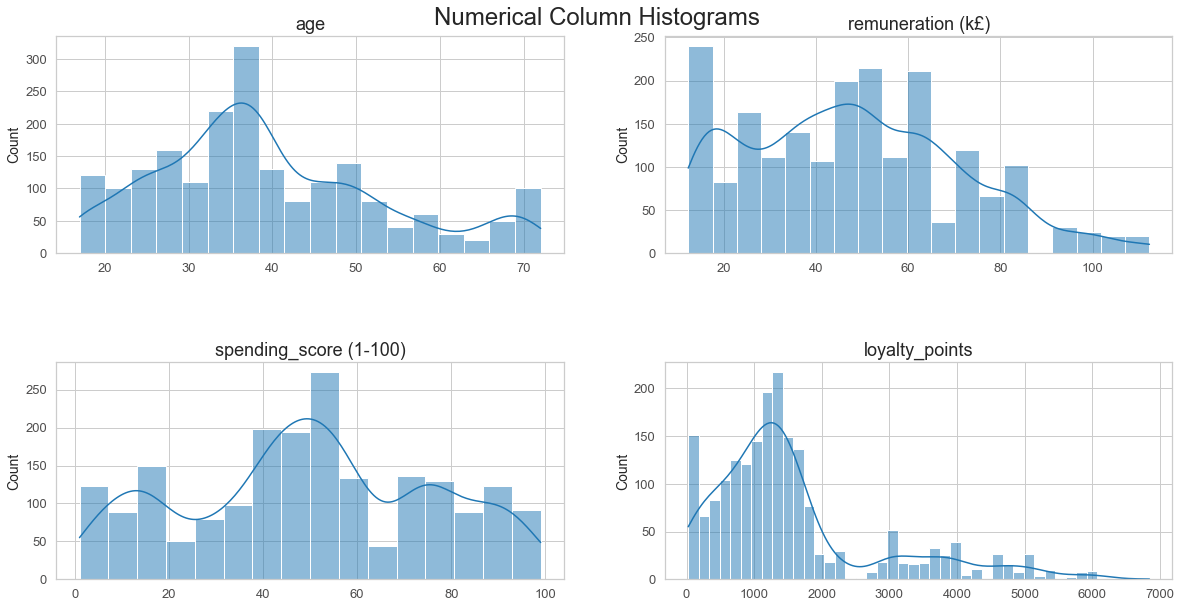

In [13]:
plot_histplots(reviews)

In [14]:
# Descriptive statistics.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

__Conclusion:__ The data in the numerical fields is interesting. None of it looks normally distributed and most of the columns are skewed. 

Loyalty Points is the only column with significant outliers and this is worthy of more investigation in case this is a mistake. However i would assume for now that the outliers are correct and just are just reflective of the value of product purchased, per the metadata. 

I would have expected some outliers in remuneration, it's a little odd that this doesn't have them given the data type. A quick look at duplicates in that data shows the following;

In [15]:
reviews['remuneration (k£)'].value_counts()  

44.28    134
63.96     96
39.36     63
49.20     62
71.34     59
        ... 
61.50     14
57.40     14
59.04     14
60.68     14
56.58     14
Name: remuneration (k£), Length: 64, dtype: int64

This shows a lot of duplicated remuneration numbers - 134 out of 2000 (nearly 7%) are 44.28k and there are __no__ non-duplicated values. This looks a _little_ bit suspicious as i would expect income to have many fewer duplicates but we will move on with this as the data.

## 2. Drop columns

In [16]:
# Drop unnecessary columns.
reviews_2 = reviews.drop(['language', 'platform'], axis=1)

# View column names.
reviews_2.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [17]:
# Rename the column headers.
# Create dict of columns to rename to pass into rename funtion - bit quicker to code
rename = {'remuneration (k£)': 'remuneration', 'spending_score (1-100)':'spending_score'}

reviews_2.rename(columns=rename, inplace=True)

# View column names.
reviews_2.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [18]:
# Create a CSV file as output.
reviews_2.to_csv('reviews_clean.csv', index=False)

In [19]:
# Import new CSV file with Pandas.
reviews_clean = pd.read_csv('reviews_clean.csv')

# View DataFrame.
reviews_clean

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

## 5. Linear regression

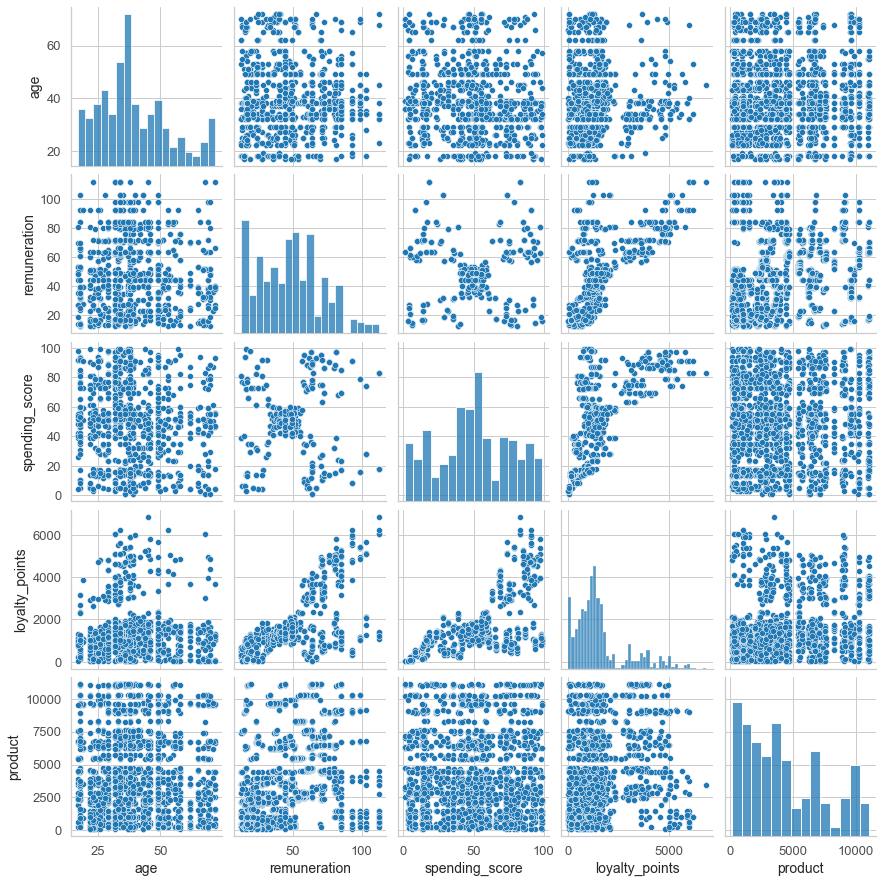

In [20]:
# First up do a quick pairplot of all the numerical columns to see if anything stands out

sns.pairplot(reviews_clean)


From these i would suggest only loyalty points v remuneration and loyalty points v spending have any suggestion of correlation.

### 5a) i) spending vs loyalty

In [21]:
# Independent variable.
x = reviews_clean['spending_score']

# Dependent variable.
y = reviews_clean['loyalty_points']

# OLS model and summary.
v = 'y ~ x' # this formula relates the columns - y is dependent variable, x is the independant variable
lr = ols(v, data = reviews_clean).fit() # runs ols method over the data and saves to the variable

# Print the regression table.
lr.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        16:32:22   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Extract the estimated parameters.
print("Parameters: ", lr.params) 

# Extract the standard errors.
print("Standard errors: ", lr.bse)  

# Extract the predicted values.
print("Predicted values: ", lr.predict()) 

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [23]:
# Set the X coefficient and the constant to generate the regression table.


# View the output.


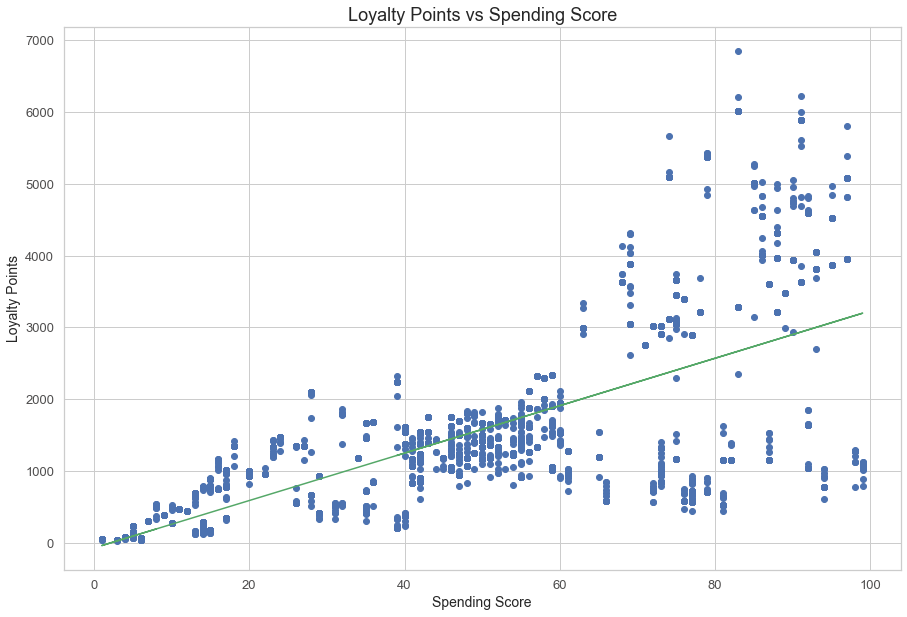

In [24]:
# calculate the y predictions using the regression equation
y_pred = 33.061693 * x - 75.052663 # coefficients from the OLS regression results

# create the plot
fig, ax = plt.subplots()

# Plot the data points.
ax.scatter(x,y, color='b')

# Plot the line.
ax.plot(x,y_pred, color='g')

# show plot
ax.set_xlabel('Spending Score')
ax.set_ylabel('Loyalty Points')
ax.set_title('Loyalty Points vs Spending Score')
#plt.xlim(0)
#plt.ylim(0)
plt.savefig('LP v SS.png')
plt.show()

### 5a) ii) spending score <60 vs loyalty

In [25]:
# filter the data
reviews_clean_filtered = reviews_clean[reviews_clean['spending_score']<60]

# Independent variable.
x = reviews_clean_filtered['spending_score']

# Dependent variable.
y = reviews_clean_filtered['loyalty_points']

# OLS model and summary.
v = 'y ~ x' # this formula relates the columns - y is dependent variable, x is the independant variable
lr = ols(v, data = reviews_clean_filtered).fit() # runs ols method over the data and saves to the variable

# Print the regression table.
lr.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     1979.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):          9.35e-266
Time:                        16:32:22   Log-Likelihood:                -9792.0
No. Observations:                1336   AIC:                         1.959e+04
Df Residuals:                    1334   BIC:                         1.960e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    154.1687     22.715      6.787      0.000     109.608     198.729
x             25.6750      0.577     44.482      0.000      24.543      26.807
==============================================================================
Omnibus:                       29.536   Durbin-Watson:                   0.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.751
Skew:                           0.337   Prob(JB):                     1.27e-07
Kurtosis:                       3.343   Cond. No.                         88.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Extract the estimated parameters.
print("Parameters: ", lr.params) 

# Extract the standard errors.
print("Standard errors: ", lr.bse)  

# Extract the predicted values.
print("Predicted values: ", lr.predict()) 

Parameters:  Intercept    154.168676
x             25.674962
dtype: float64
Standard errors:  Intercept    22.714653
x             0.577195
dtype: float64
Predicted values:  [1155.49218447  308.21844618 1181.16714623 ...  359.56836972  564.96806385
  359.56836972]


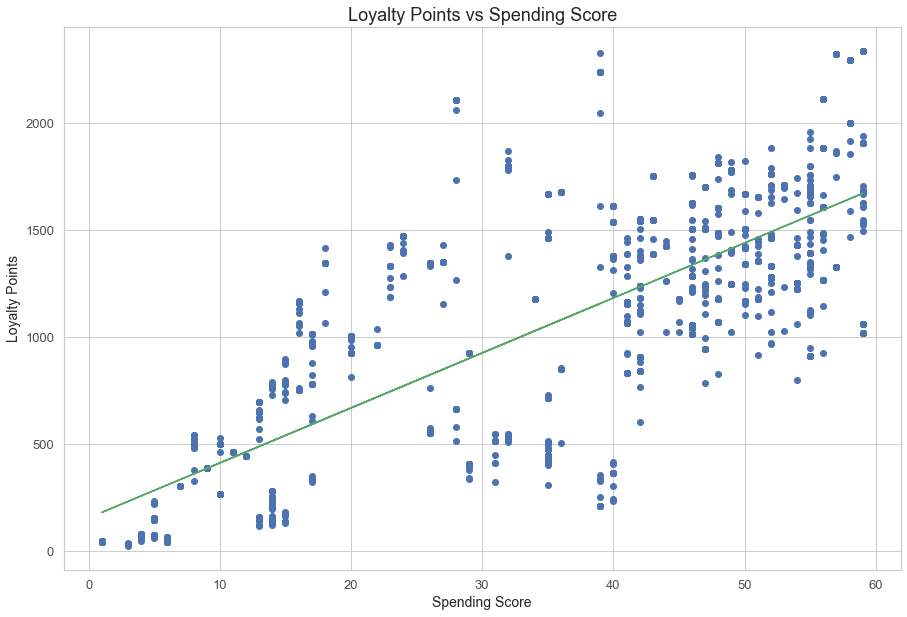

In [27]:
# calculate the y predictions using the regression equation
y_pred = 25.674962 * x +154.168679 # coefficients from the OLS regression results

# create the plot
fig, ax = plt.subplots()

# Plot the data points.
ax.scatter(x,y, color='b')

# Plot the line.
ax.plot(x,y_pred, color='g')

# show plot
ax.set_xlabel('Spending Score')
ax.set_ylabel('Loyalty Points')
ax.set_title('Loyalty Points vs Spending Score')
#plt.xlim(0)
#plt.ylim(0)
plt.show()

### 5b) remuneration vs loyalty

In [28]:
# Independent variable.
x = reviews_clean['remuneration']

# Dependent variable.
y = reviews_clean['loyalty_points']

# OLS model and summary.
v = 'y ~ x' # this formula relates the columns - y is dependent variable, x is the independant variable
lr = ols(v, data = reviews_clean).fit() # runs ols method over the data. 

# Print the regression table.
lr.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        16:32:23   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Extract the estimated parameters.
print("Parameters: ", lr.params) 

# Extract the standard errors.
print("Standard errors: ", lr.bse)  

# Extract the predicted values.
print("Predicted values: ", lr.predict()) 

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [30]:
# Set the the X coefficient and the constant to generate the regression table.


# View the output.


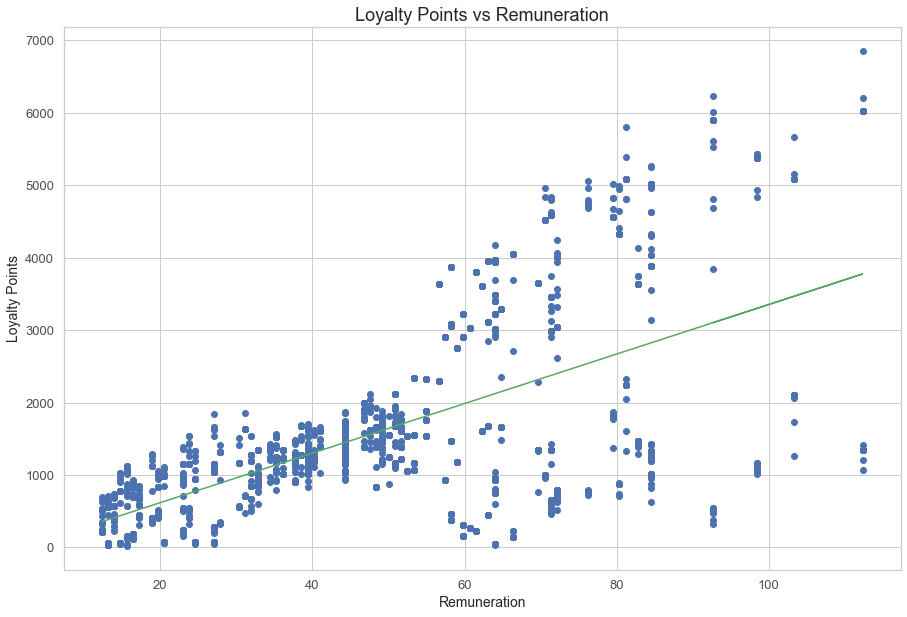

In [31]:
# calculate the y predictions using the regression equation
y_pred = 34.187825 * x - 65.686513

# create the plot
fig, ax = plt.subplots()

# Plot the data points.
ax.scatter(x,y, color='b')

# Plot the line.
ax.plot(x,y_pred, color='g')

# show plot
ax.set_xlabel('Remuneration')
ax.set_ylabel('Loyalty Points')
ax.set_title('Loyalty Points vs Remuneration')
#plt.xlim(0)
#plt.ylim(0)
plt.savefig('LP v R.png')
plt.show()

### 5b) ii) remuneration <55 vs loyalty

In [32]:
# filter the data
reviews_clean_filtered = reviews_clean[reviews_clean['remuneration']<55]

# Independent variable.
x = reviews_clean_filtered['remuneration']

# Dependent variable.
y = reviews_clean_filtered['loyalty_points']

# OLS model and summary.
v = 'y ~ x' # this formula relates the columns - y is dependent variable, x is the independant variable
lr = ols(v, data = reviews_clean_filtered).fit() # runs ols method over the data and saves to the variable

# Print the regression table.
lr.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     2153.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):          8.88e-277
Time:                        16:32:23   Log-Likelihood:                -9273.3
No. Observations:                1286   AIC:                         1.855e+04
Df Residuals:                    1284   BIC:                         1.856e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5503     25.333     -0.614      0.539     -65.248      34.148
x             32.2286      0.695     46.397      0.000      30.866      33.591
==============================================================================
Omnibus:                       15.755   Durbin-Watson:                   2.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.473
Skew:                          -0.120   Prob(JB):                      0.00323
Kurtosis:                       2.604   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Extract the estimated parameters.
print("Parameters: ", lr.params) 

# Extract the standard errors.
print("Standard errors: ", lr.bse)  

# Extract the predicted values.
print("Predicted values: ", lr.predict()) 

Parameters:  Intercept   -15.550317
x            32.228606
dtype: float64
Standard errors:  Intercept    25.332656
x             0.694632
dtype: float64
Predicted values:  [380.86154001 380.86154001 407.28899711 ... 512.99882554 512.99882554
 512.99882554]


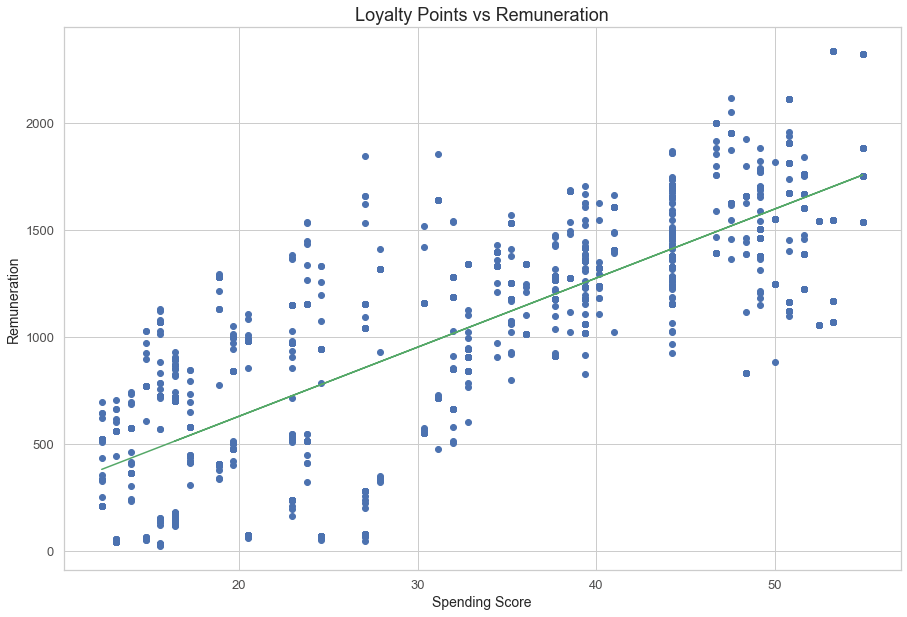

In [34]:
# calculate the y predictions using the regression equation
y_pred = 32.228606 * x -15.550317 # coefficients from the OLS regression results

# create the plot
fig, ax = plt.subplots()

# Plot the data points.
ax.scatter(x,y, color='b')

# Plot the line.
ax.plot(x,y_pred, color='g')

# show plot
ax.set_xlabel('Spending Score')
ax.set_ylabel('Remuneration')
ax.set_title('Loyalty Points vs Remuneration')
#plt.xlim(0)
#plt.ylim(0)
plt.show()

### 5c) age vs loyalty

In [35]:
# Independent variable.
x = reviews_clean['age']

# Dependent variable.
y = reviews_clean['loyalty_points']

# OLS model and summary.
v = 'y ~ x' # this formula relates the columns - y is dependent variable, x is the independant variable
lr = ols(v, data = reviews_clean).fit() # runs ols method over the data. 

# Print the regression table.
lr.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 18 Sep 2022   Prob (F-statistic):             0.0577
Time:                        16:32:23   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Extract the estimated parameters.
print("Parameters: ", lr.params) 

# Extract the standard errors.
print("Standard errors: ", lr.bse)  

# Extract the predicted values.
print("Predicted values: ", lr.predict()) 

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [37]:
# Set the X coefficient and the constant to generate the regression table.


# View the output.


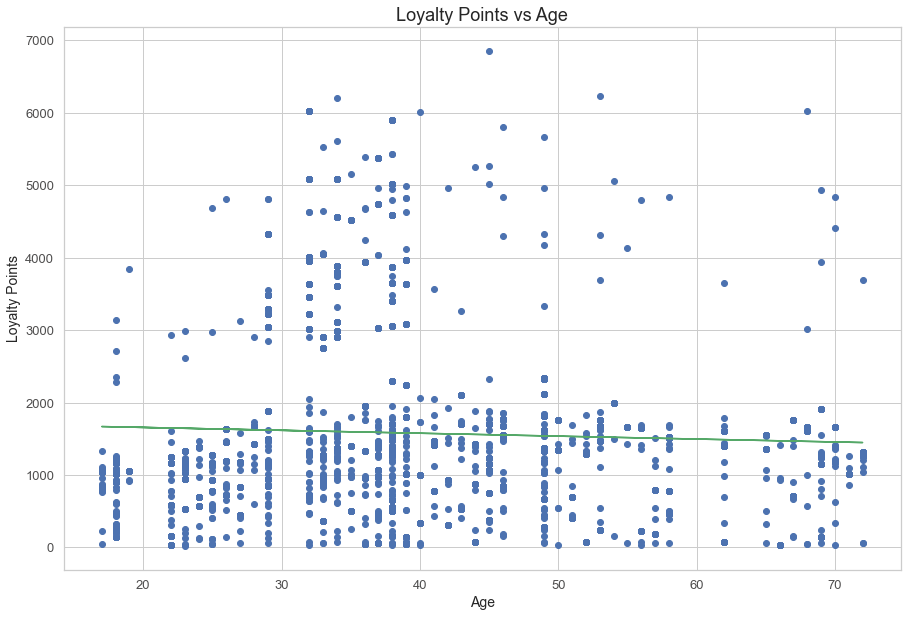

In [38]:
# calculate the y predictions using the regression equation
y_pred = -4.012805 * x + 1736.517739

# create the plot
fig, ax = plt.subplots()

# Plot the data points.
ax.scatter(x,y, color='b')

# Plot the line.
ax.plot(x,y_pred, color='g')

# show plot
ax.set_xlabel('Age')
ax.set_ylabel('Loyalty Points')
ax.set_title('Loyalty Points vs Age')
#plt.xlim(0)
#plt.ylim(0)
plt.savefig('LP v A.png')
plt.show()

## 6. Observations and insights

***Your observations here...***






__Loyalty Points vs Spending Score__

-	The coefficients of the best fit line estimate that for every 1 point increase in spending score, loyalty points will increase by 33.06.
-	r^2 of 0.452 suggests a slight positive correlation between the numbers, however it is not strong. 
-	This is particularly caused by the spending scores over 60 where you can see in the data that the points are spread much more widely. This shape suggests some heteroscedasticity.
-	Running a linear regression just on spending score upt to 60 shows a much stronger correlation, r^2 of 0.597.
-	Further analysis could be done on the larger loyalty point customers to understand why they diverge from the correlation of lower spending scores.
-	Overall I would not recommend Spending Score to be an accurate predictor of Loyalty Points

__Loyalty Points v Remuneration__

-	The coefficients of the best fit line estimate that for every £1k increase in remuneration, loyalty points will increase by 34.19.
-	r^2 of 0.38 suggests a weak positive correlation between the numbers. 
-	Again similar to Loyalty points, the shape of the data suggest heteroscedasticity, with the divergence from the best fit line coming from customers earning over ~55k.
-	Running a linear regression just on remuneration upto 60 shows a much stronger correlation, r^2 of 0.63.
-	Similar questions remain as per the previous point – why the divergence after this point? Could it lead to any further insight?

__Loyalty Points v Age__

-	The coefficients of the best fit line estimate that for every 1 year increase in remuneration, loyalty points will decrease by 4.01.
-	r^2 of 0.002 suggests virtually no correlation.
-	The relationship is so weak that even the age variable gets a p value over 0.05.

__Overall Conclusions__

-  there is no single variable here that correlates well with spending score so as to be a good predictor of it, all of the relationships have an r^2 under 0.5 and are therefore quite weak. I would not recommend using any of them to try and predict spending score
-  further analysis could be done, such as multiple linear regression using a combination of the variables to see if a combination of them results in a better predictive model, or a transformation of some of the variables that show heteroscedasticity by taking logs or square roots.


## 7. Further Analysis - Multiple Linear Regression

As additional analysis i will build a multiple linear regression model and review it's suitability.

Start with the 3 numerical variables we have just worked through, remuneration, age and spending score.

In [39]:
# Define the dependent variable.
y = reviews_clean['loyalty_points']  

# Define the independent variables.
X = reviews_clean[['remuneration', 'spending_score', 'age']] 

In [40]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [41]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,
                                                                            y,
                                                                            test_size = 0.20,
                                                                            random_state = 0)

In [42]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     2671.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:32:23   Log-Likelihood:                -12282.
No. Observations:                1600   AIC:                         2.457e+04
Df Residuals:                    1596   BIC:                         2.459e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2172.6331     59.215    -36.

C:\Users\david\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


An r^2 of 0.834 is much improved. 

Test what it looks like when i remove age, as age correlation with loyalty points on its own was nearly zero.

In [43]:
# Define the dependent variable.
y = reviews_clean['loyalty_points']  

# Define the independent variable.
X = reviews_clean[['remuneration', 'spending_score']] 

In [44]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [45]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,
                                                                            y,
                                                                            test_size = 0.20,
                                                                            random_state = 0)

In [46]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     3640.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:32:24   Log-Likelihood:                -12346.
No. Observations:                1600   AIC:                         2.470e+04
Df Residuals:                    1597   BIC:                         2.471e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1657.3712     40.352    -41.

C:\Users\david\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.82 r^2 - virtually no change, so i think it should be left out as it adds no value to the regression. Continue with just remuneration and spending score.

In [47]:
# Fit the model.
mlr.fit(X_test, y_test) 

# Call the predictions for X in the test set.
y_pred_mlr= mlr.predict(X_test)  

In [48]:
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_mlr).round(2)) 

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_pred_mlr).round(2))

Mean Absolute Error: 378.33
Mean Absolute Percentage Error: 1.05


The mean absolute error of the model looks reasonable, however the MAPE is over 100% suggesting this model is bad. However, this i likely because of some true values at or close to zero skewing this calculation

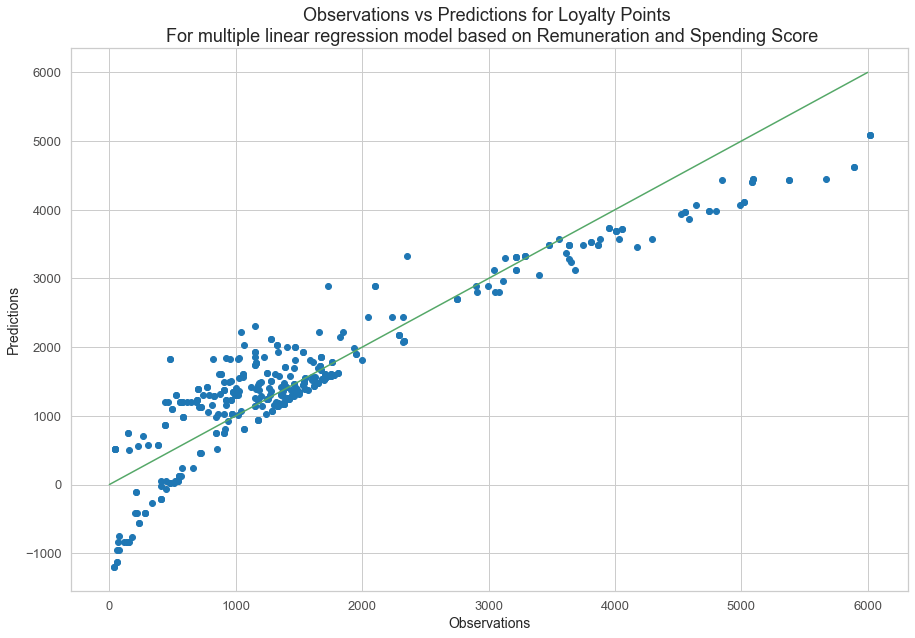

In [49]:
## plotting predicted values v actual
x1 = range(0,6000,1)
y1 = x1

plt.scatter(y_test, y_pred_mlr)
plt.plot(x1, y1, color='g')
plt.xlabel('Observations')
plt.ylabel('Predictions')
plt.title('Observations vs Predictions for Loyalty Points \n For multiple linear regression model based on \
Remuneration and Spending Score')
plt.savefig('MLR results.png')

Above shows a mapping of the actual values vs the predictions the model makes. The green line is 100% accuracy, as you can see the model makes bigger errors at the extremes of the Loyalty Points data field.

In [50]:
# Check for colinearity of the variables
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. vif["VIF Factor"] = [variance_inflation_factor(x_temp.values,
# i) for i in range(x_temp.values.shape[1])].  
# Calculate the ‘vif’ for each value.
vif = pd.DataFrame()  

# create VIF Factor column
vif['VIF factor'] = [variance_inflation_factor(x_temp.values,i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns 



# Print the values to two decimal points.
print(vif.round(2))  

   VIF factor        features
0        8.81           const
1        1.00    remuneration
2        1.00  spending_score


C:\Users\david\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


These values are low so we can be comfortable there is no co-linearity there.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [51]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [52]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews_clean.csv')

# View DataFrame.
df2

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [53]:
# Drop unnecessary columns.
df3 = df2[['remuneration', 'spending_score']]

# View DataFrame.
df3

remuneration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]

In [54]:
# Explore the data.


In [55]:
# Descriptive statistics.
df3.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

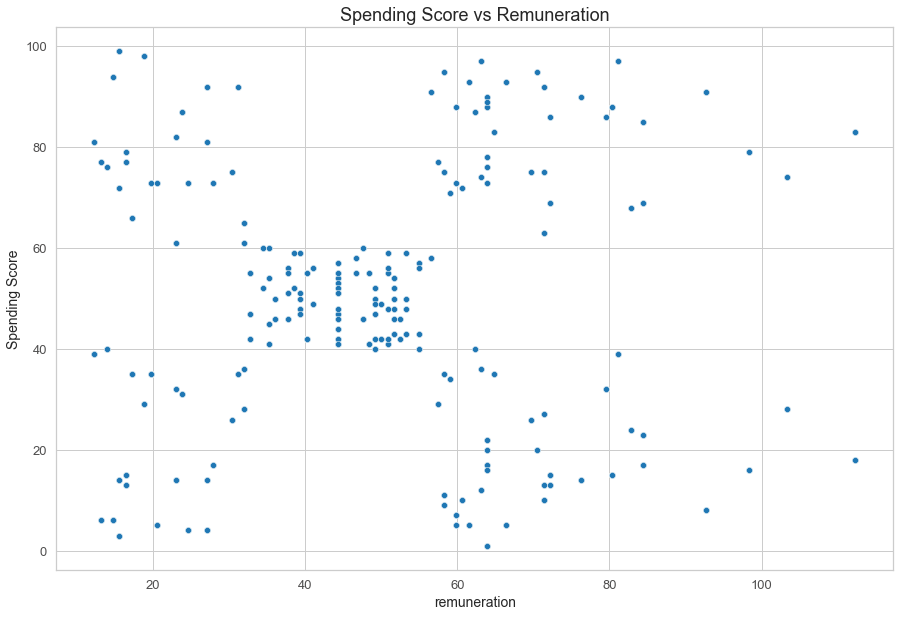

In [56]:
# Create a scatterplot with Seaborn.

# create the plot
#fig, ax = plt.subplots()

# Plot the data points.
ax = sns.scatterplot(df3['remuneration'],df3['spending_score'])


# show plot
#ax.set_xlabel('Remuneration')
ax.set_ylabel('Spending Score')
ax.set_title('Spending Score vs Remuneration')
#plt.xlim(0)
#plt.ylim(0)
plt.savefig('SS v R')
plt.show()

From viewing this visualiation it looks like there are 5 clusters in the data

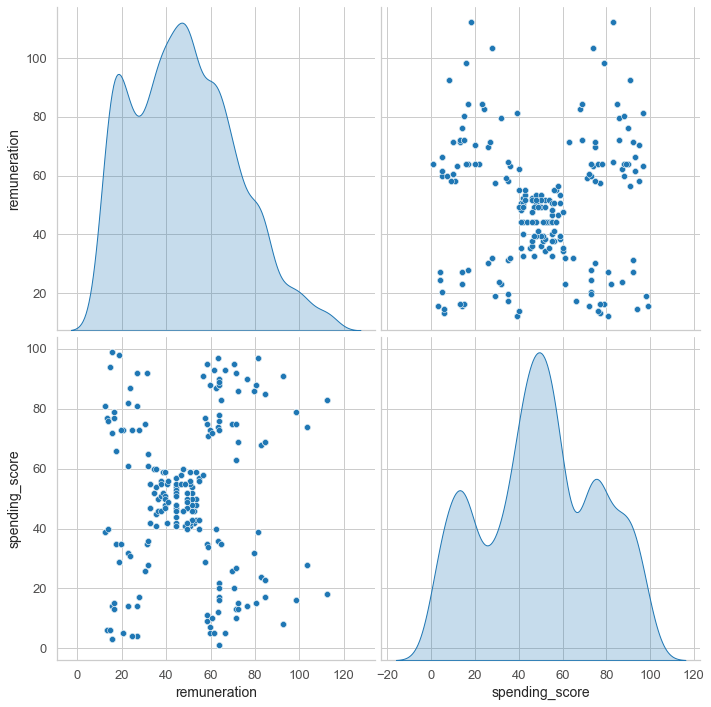

In [57]:
# Create a pairplot with Seaborn.

# create the plot
#fig, ax = plt.subplots()

# Plot the data points.
ax = sns.pairplot(df3, diag_kind = 'kde', height = 5)


# show plot
#ax.set_xlabel('Remuneration')
#ax.set_ylabel('Spending Score')
#ax.set_title('Spending Score vs Remuneration')
#plt.xlim(0)
#plt.ylim(0)
#plt.show()

## 3. Elbow and silhoutte methods

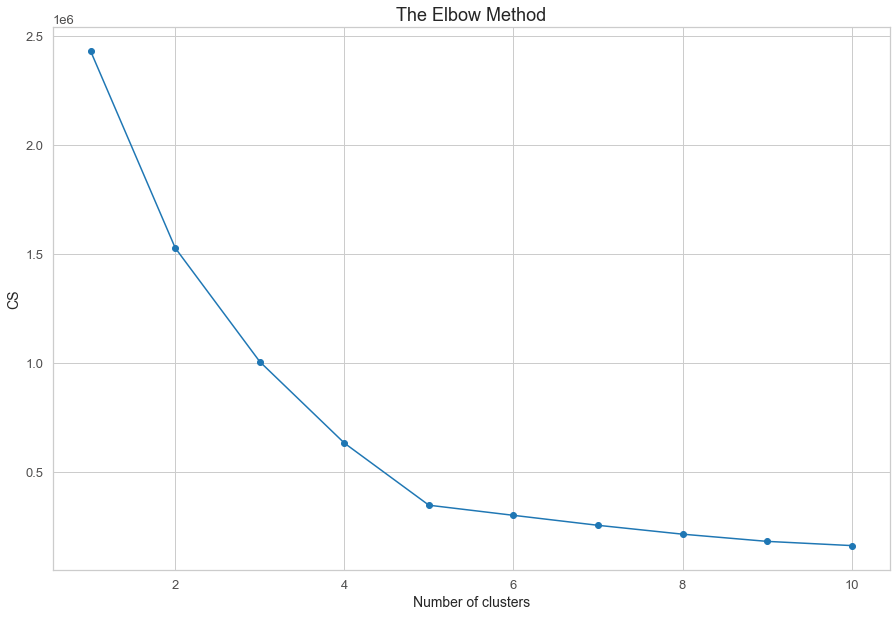

In [58]:
# Determine the number of clusters: Elbow method.

# create a list of variables to plot
x = df3[['remuneration', 'spending_score']]

cs = [] # create empty list to hold results

for i in range(1, 11): # for loop to check 10 clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0) # runs the cluster algo for each number of clusters
    kmeans.fit(x) # fit on the x data set - above filteres just the sepia length and width
    cs.append(kmeans.inertia_) # adds the inertia value (sum of squared errors) to the cs list

plt.plot(range(1, 11), cs, marker='o') # create plot same as the range for the loop
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")
plt.savefig('elbow.png')
plt.show()

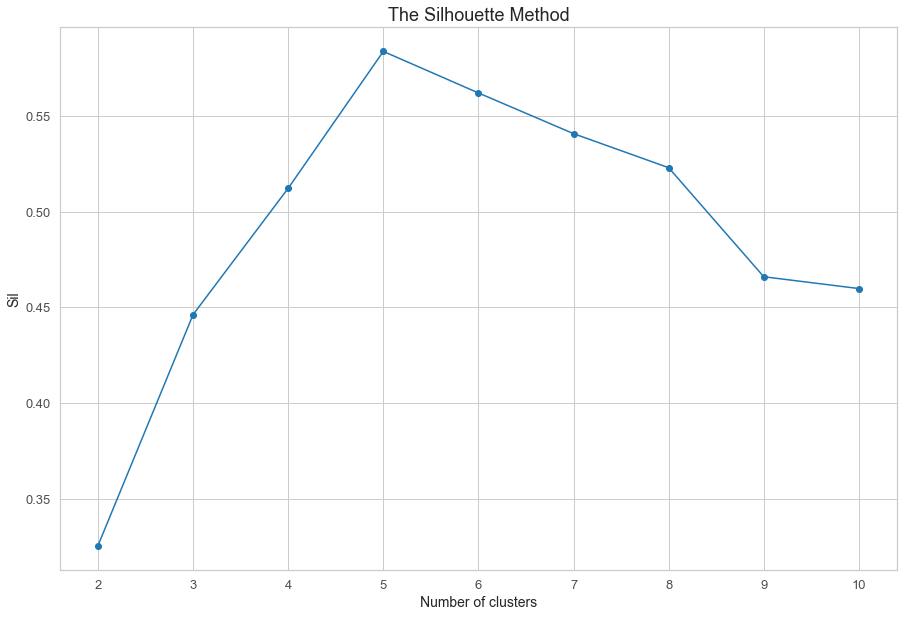

In [59]:
# Determine the number of clusters: Silhouette method.
sil = [] # empty list to store results
kmax = 10 # max clusters - could use this above tbh would be more pythonic

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k) # create the model
    kmeans_s.fit(x) # fit the model
    labels = kmeans_s.labels_ # state labels dunno why 
    sil.append(silhouette_score(x, labels, metric = 'euclidean')) # append silhouette score to the sil list

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")
plt.savefig('silhou.png')
plt.show()

__Conclusion:__ Both methods point to the ideal number of clusters being 5, as this is the point that the slopes begin to flatten. I will look at the k-means clustering algorithm for 4, 5 and 6 clusters to analyse which looks to be the best number to use.

## 4. Evaluate k-means model at different values of *k*

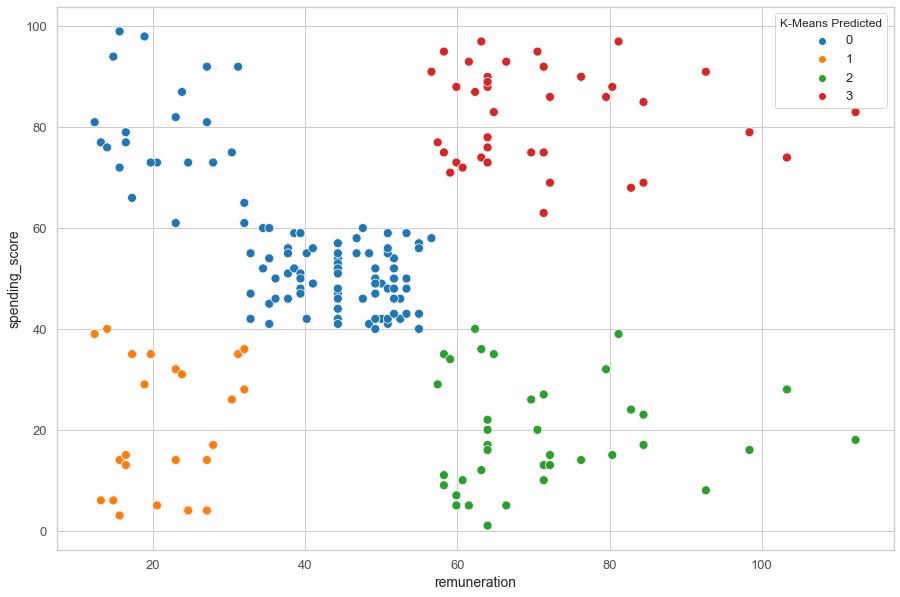

In [60]:
# 4 clusters:
# create model and fit to the dataset, x (created earlier)
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_  # creates array of the cluster numbers given
x['K-Means Predicted'] = clusters  # adds column to the df to specify which cluster

# Plot the predicted.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette="tab10",
                s=80)

# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

# Pass counts to a list for summary
clusters_4 = x['K-Means Predicted'].value_counts()

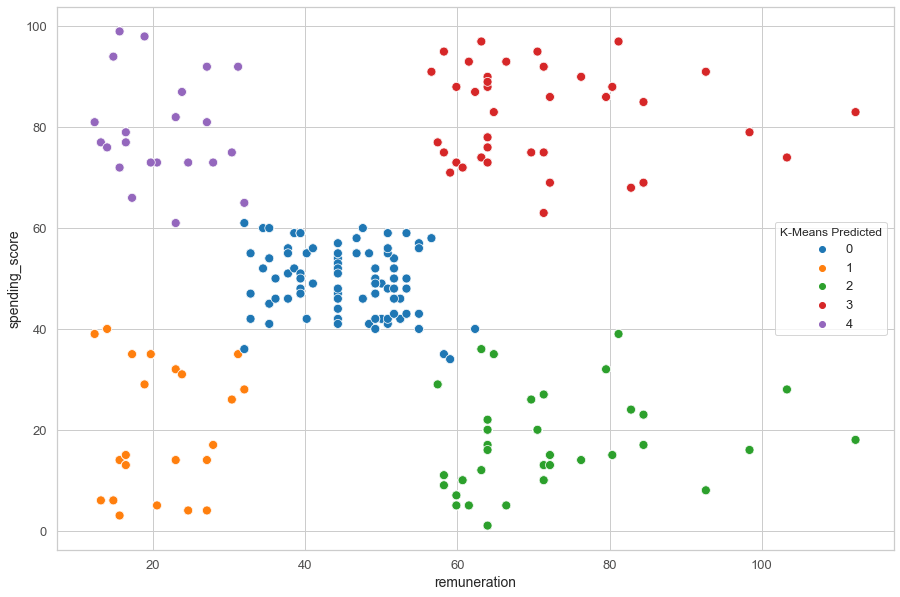

In [61]:
# 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_  
x['K-Means Predicted'] = clusters  

# Plot the predicted.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette="tab10",
                s=80)

# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

# Pass counts to a list for summary
clusters_5 = x['K-Means Predicted'].value_counts()

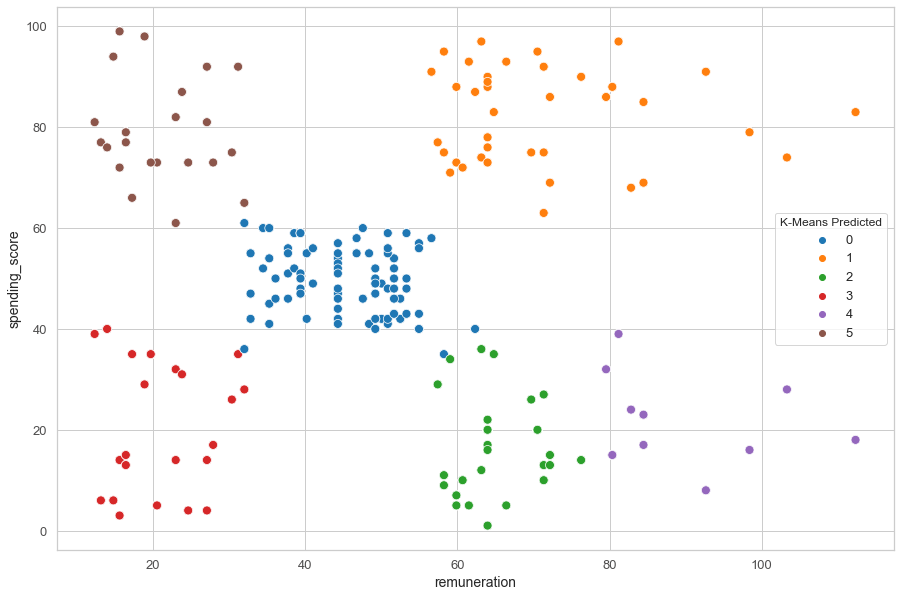

In [62]:
# 6 clusters:
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_  
x['K-Means Predicted'] = clusters  

# Plot the predicted.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette="tab10",
                s=80)

# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

# Pass counts to a list for summary
clusters_6 = x['K-Means Predicted'].value_counts()

## 5. Fit final model and justify your choice

__Conclusion__
The optimal number of clusters is 5. The reason for this being that visually on the scatterplot this gives us the most clearly defined clusters out of all the options, with clear boundaries and no overlaps. Secondly, running a quick visualition of the observation counts, you can see that of the 3 options, 5 clusters gives the most even spread. In 4 clusters, cluster 1 is overly dominent. In 5 clusters 0 is a dominent cluster but less so that cluster 1 in the previous example. Cluster 6 does nothing to reduce the size of cluster 0, it just takes from the other clusters to create a new one. Therefore i think 5 clusters is the best option.

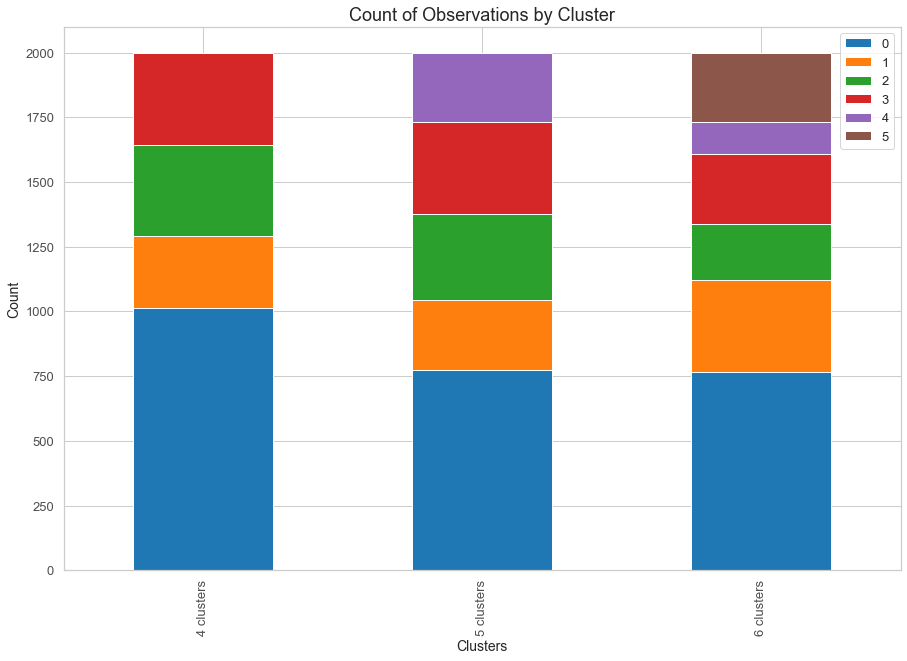

In [63]:
# put value counts in a dataframe
clusters_list = pd.DataFrame({'4 clusters':clusters_4, '5 clusters':clusters_5, '6 clusters':clusters_6})

# replace nas with 0
clusters_list = clusters_list.fillna(0)

# transpose so the chart shows the right thing
clusters_list_t = clusters_list.transpose()

# Plot the data points.
ax = clusters_list_t.plot(kind='bar', stacked=True)

# show plot
ax.set_xlabel('Clusters')
ax.set_ylabel('Count')
ax.set_title('Count of Observations by Cluster')
plt.show()

In [64]:
# Check the number of observations per predicted class.
clusters_list_t

0      1      2      3      4      5
4 clusters  1013.0  280.0  351.0  356.0    0.0    0.0
5 clusters   774.0  271.0  330.0  356.0  269.0    0.0
6 clusters   767.0  356.0  214.0  271.0  123.0  269.0

## 6. Plot and interpret the clusters

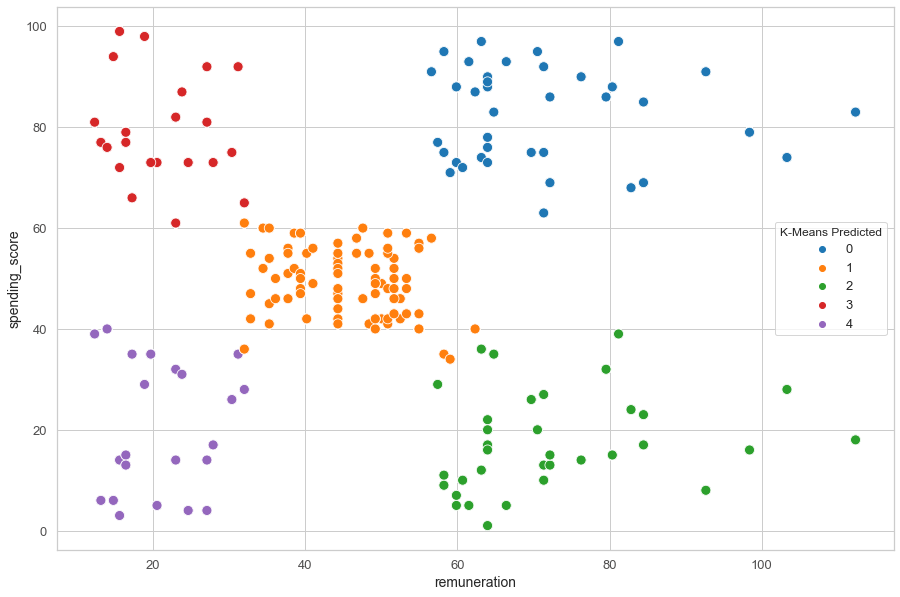

In [65]:
# 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_  
x['K-Means Predicted'] = clusters  

# Plot the predicted.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette="tab10",
                s=100)
plt.savefig('KM5.png')

In [66]:
# view the dataframe
x

remuneration  spending_score  K-Means Predicted
0            12.30              39                  4
1            12.30              81                  3
2            13.12               6                  4
3            13.12              77                  3
4            13.94              40                  4
...            ...             ...                ...
1995         84.46              69                  0
1996         92.66               8                  2
1997         92.66              91                  0
1998         98.40              16                  2
1999         92.66               8                  2

[2000 rows x 3 columns]

## 7. Discuss: Insights and observations

Choosing 5 clusters now leads to distinct groups that can be labelled;

0 = mid-spending score, mid-remuneration
1 = low-spending score, low-remuneration
2 = low-spending score, high-remuneration
3 = high-spending score, high-remuneration
4 = high-spending score, low-remuneration

Following this i would like to pursue extra analysis on a couple of areas. One being what other characteristics they may share (gender, education, age, what products they buy) and this information can be used for targeted marketing as required. Secondly looking at the review and summary comments in relation to the groups and whether one group is more likely than another to have positive or negative sentiment towards theiwr purchases.

Clustering should be reviewed regularly to ensure 5 is still

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [67]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

#nltk.download('punkt')
#nltk.download('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [68]:
# Load the data set as df4.
df4 = pd.read_csv('reviews_clean.csv')

# View DataFrame.
df4

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [69]:
# Explore data set.
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [70]:
# Keep necessary columns. Drop unnecessary columns.
df4 = df4[['review', 'summary']]

# View DataFrame.
df4

review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [71]:
# Determine if there are any missing values.
df4.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [72]:
# Review: Change all to lower case and join with a space.
df4['review'] = df4['review'].apply(lambda x: " ".join(x.lower() for x in x.split())) 
# splits the sentence into words, converts to lower case then rejoins. removes newline characters too

# check df
df4['review']

0       when it comes to a dm's screen, the space on t...
1       an open letter to galeforce9*: your unpainted ...
2       nice art, nice printing. why two panels are fi...
3       amazing buy! bought it as a gift for our new d...
4       as my review of gf9's previous screens these w...
                              ...                        
1995    the perfect word game for mixed ages (with mom...
1996    great game. did not think i would like it when...
1997    great game for all......... keeps the mind nim...
1998                                            fun game!
1999    this game is fun. a lot like scrabble without ...
Name: review, Length: 2000, dtype: object

In [73]:
# Summary: Change all to lower case and join with a space.
df4['summary'] = df4['summary'].apply(lambda x: " ".join(x.lower() for x in x.split())) 
# splits the sentence into words, converts to lower case then rejoins. removes newline characters too

# check df
df4['summary']

0       the fact that 50% of this space is wasted on a...
1       another worthless dungeon master's screen from...
2                         pretty, but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995       the perfect word game for mixed ages (with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [74]:
# Replace all the punctuations in review column.
# use regex
df4['review'] = df4['review'].str.replace('[^\w\s]', "")

# View output.
df4['review']

0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9 your unpainted mi...
2       nice art nice printing why two panels are fill...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
                              ...                        
1995    the perfect word game for mixed ages with mom ...
1996    great game did not think i would like it when ...
1997             great game for all keeps the mind nimble
1998                                             fun game
1999    this game is fun a lot like scrabble without a...
Name: review, Length: 2000, dtype: object

In [75]:
# Replace all the puncuations in summary column.
df4['summary'] = df4['summary'].str.replace('[^\w\s]', "")

# View output.
df4['summary']



0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995        the perfect word game for mixed ages with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### 2c) Drop duplicates in both columns

In [76]:
# to support some further work later on in the notebook i have decided not to drop duplicates. Having looked at the
# comments, leaving them in does not materially change the analysis and represents less than 2% of the sample.

# Drop duplicates in both columns.
#df4 = df4.drop_duplicates()

# View DataFrame.
#df4.reset_index(drop=True, inplace=True)

#df4
# 39 rows removed

## 3. Tokenise and create wordclouds

In [77]:
# Create new DataFrame (copy DataFrame).
df5 = df4

# View DataFrame.
df5

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[2000 rows x 2 columns]

In [78]:
# Apply tokenisation to both columns.
df5['tokens_review'] = df5['review'].apply(lambda x: word_tokenize(x))
df5['tokens_summary'] = df5['summary'].apply(lambda x: word_tokenize(x))

# View DataFrame.
df5

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1995      the perfect word game for mixed ages with mom   
1996                                          super fun   
1997                                         great game   
1998                                         four stars   
1999                                     love this game   

                                          tokens_review  \
0     [when, it, comes, to, a, dms, screen, the, spa...   
1     [an, open, letter, to, galeforce9, your, unpai...   
2     [nice, art, nice, printing, why, two, panels, ...   
3     [amazing, buy, bought, it, as, a, gift, for, o...   
4     [as, my, review, of, gf9s, previous, screens, ...   
...                                                 ...   
1995  [the, perfect, word, game, for, mixed, ages, w...   
1996  [great, game, did, not, think, i, would, like,...   
1997  [great, game, for, all, keeps, the, mind, nimble]   
1998                                        [fun, game]   
1999  [this, game, is, fun, a, lot, like, scrabble, ...   

                                         tokens_summary  
0     [the, fact, that, 50, of, this, space, is, was...  
1     [another, worthless, dungeon, masters, screen,...  
2                  [pretty, but, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                                                 ...  
1995  [the, perfect, word, game, for, mixed, ages, w...  
1996                                       [super, fun]  
1997                                      [great, game]  
1998                                      [four, stars]  
1999                                 [love, this, game]  

[2000 rows x 4 columns]

In [79]:
# textt = " ".join(review for review in df5.review)

# Review: Create a word cloud.
all_reviews_str = ''
for i in range(len(df5)): # this iterates throughs all the rows in the df. could us for i in range (len(survey))
    # Add each comment.
    all_reviews_str = all_reviews_str + " " +df5.review[i]

In [80]:
# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews_str) 

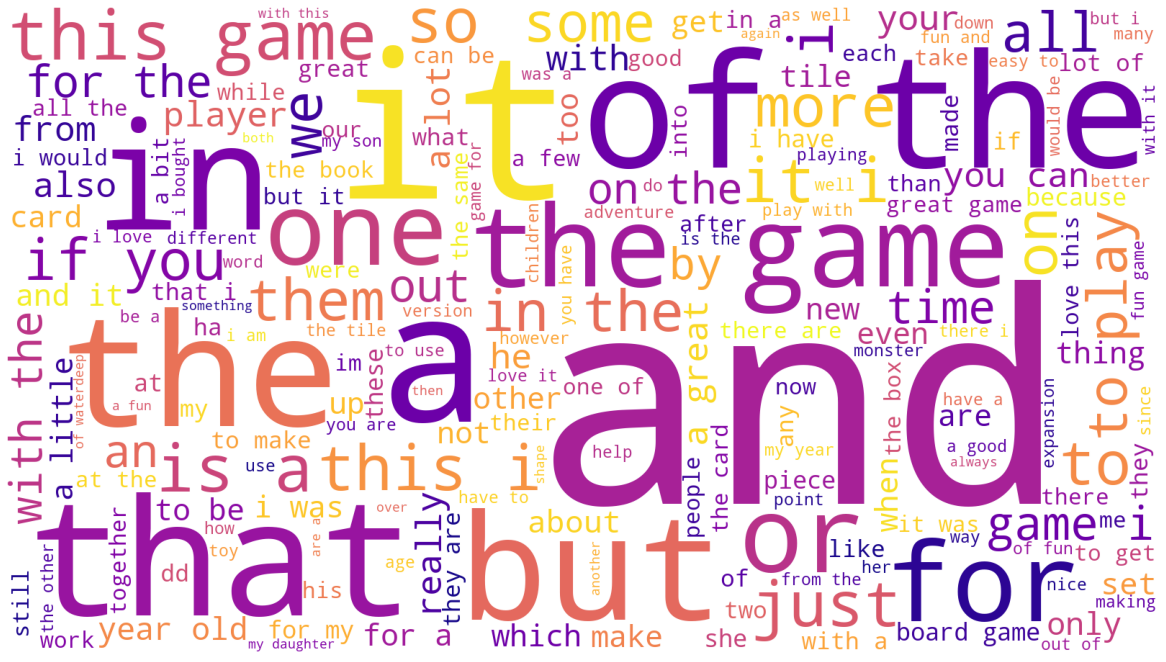

In [81]:
# Review: Plot the WordCloud image.                  
plt.figure(figsize = (16, 9), facecolor = None) # sets the figure and calls the size
plt.imshow(word_cloud) 
plt.axis("off") # removes axes
plt.tight_layout(pad = 0)  # removes padding in the jupyter workbook
plt.show()


In [82]:
# Summary: Create a word cloud.
all_summary_str = ''
for i in range(len(df5)): # this iterates throughs all the rows in the df. could us for i in range (len(survey))
    # Add each comment.
    all_summary_str = all_summary_str + " " +df5.summary[i]

In [83]:
# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary_str) 

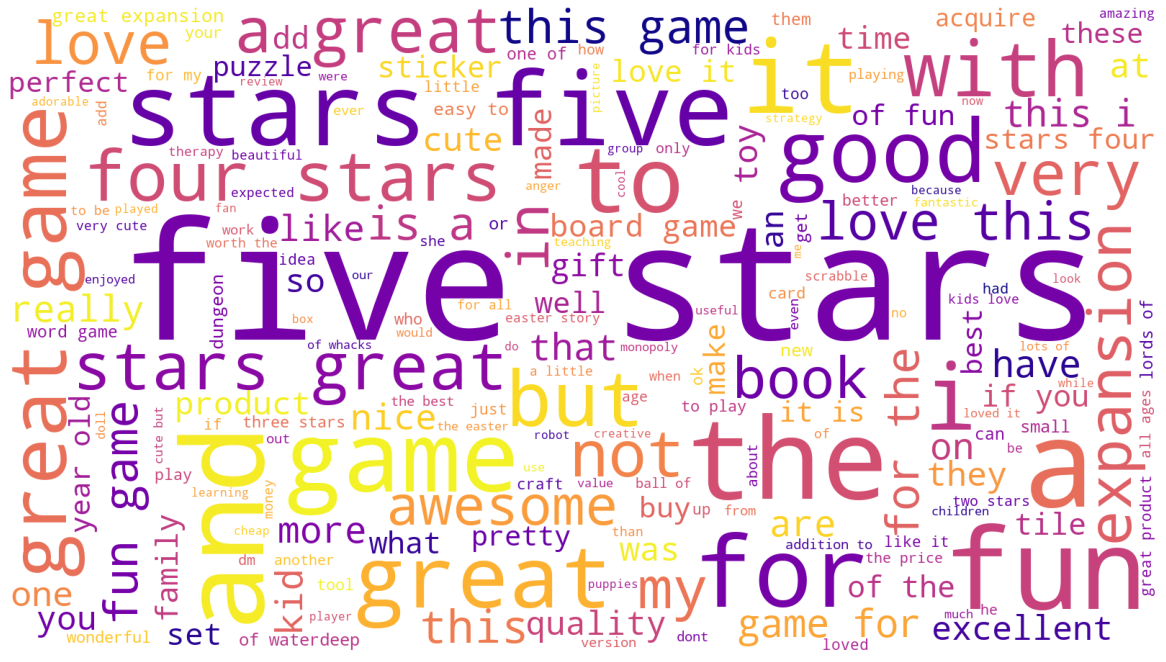

In [84]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) # sets the figure and calls the size
plt.imshow(word_cloud) 
plt.axis("off") # removes axes
plt.tight_layout(pad = 0)  # removes padding in the jupyter workbook
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [85]:
# Reviews:
# tokenize the string created prviously
all_reviews_tokens = word_tokenize(all_reviews_str)

In [86]:
# Determine the frequency distribution.
fdistrev = FreqDist(all_reviews_tokens)

In [87]:
fdistrev

FreqDist({'the': 5452, 'and': 3234, 'to': 3164, 'a': 3161, 'of': 2488, 'i': 2091, 'it': 2090, 'is': 1782, 'this': 1776, 'game': 1685, ...})

In [88]:
# Summary:
# tokenize the string created prviously
all_summary_tokens = word_tokenize(all_summary_str)

In [89]:
# Determine the frequency distribution.
fdistsum = FreqDist(all_summary_tokens)

In [90]:
fdistsum

FreqDist({'stars': 466, 'five': 381, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [91]:
# Reviews

# Remove all the non-alphanumeric tokens
reviews_clean = [word for word in all_reviews_tokens if word.isalnum()]

In [92]:
# Remove all the stopwords
# import English stopwords from nklt
english_stopwords = set(stopwords.words('english'))

# filter the reviews to exclude stopwords
reviews_final = [x for x in reviews_clean if x.lower() not in english_stopwords]

# create an empty string to store final word list
reviews_final_string = ''

# pass each word from the final list into the string
for value in reviews_final:
    reviews_final_string = reviews_final_string + value + " "

In [93]:
# Summary

# Remove all the non-alphanumeric tokens
summary_clean = [word for word in all_summary_tokens if word.isalnum()]

In [94]:
# Remove all the stopwords
# import English stopwords from nklt
english_stopwords = set(stopwords.words('english'))

# filter the reviews to exclude stopwords
summary_final = [x for x in summary_clean if x.lower() not in english_stopwords]

# create an empty string to store final word list
summary_final_string = ''

# pass each word from the final list into the string
for value in summary_final:
    summary_final_string = summary_final_string + value + " "

### 4c) Create wordcloud without stopwords

In [95]:
# Reviews
# Create a wordcloud without stop words.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                collocations=False,
                min_font_size = 10).generate(reviews_final_string) 

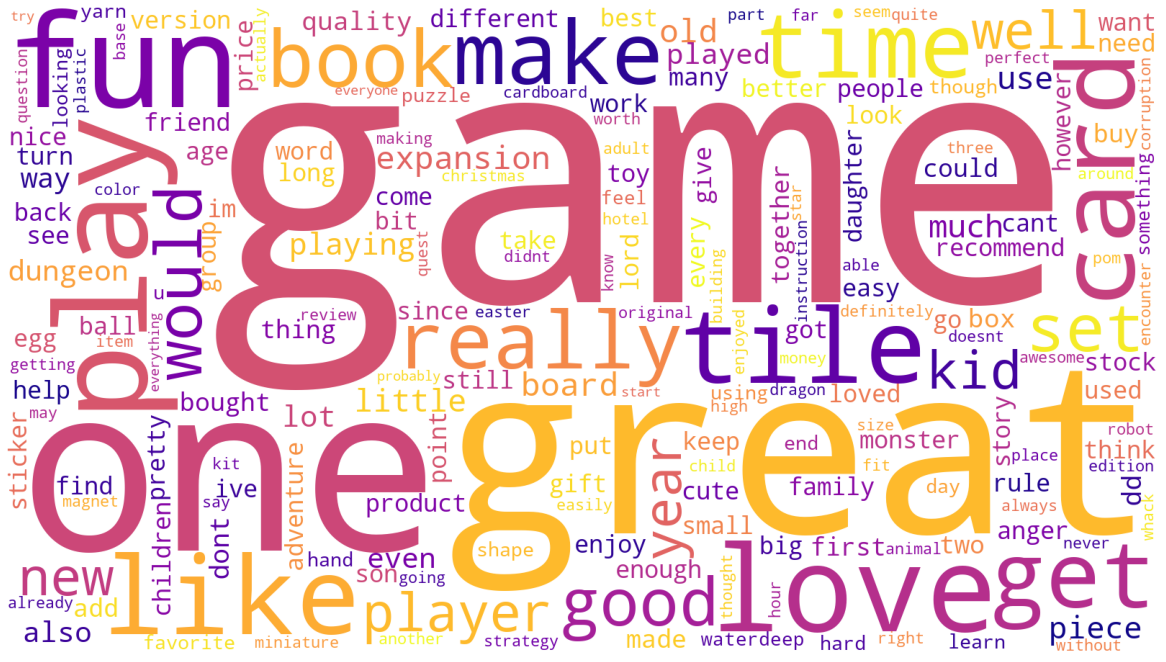

In [96]:
# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) # sets the figure and calls the size
plt.imshow(word_cloud) 
plt.axis("off") # removes axes
plt.tight_layout(pad = 0)  # removes padding in the jupyter workbook
plt.savefig('wcr.png')
plt.show()

In [97]:
# Summary
# Create a wordcloud without stop words.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                collocations=False,
                min_font_size = 10).generate(summary_final_string) 

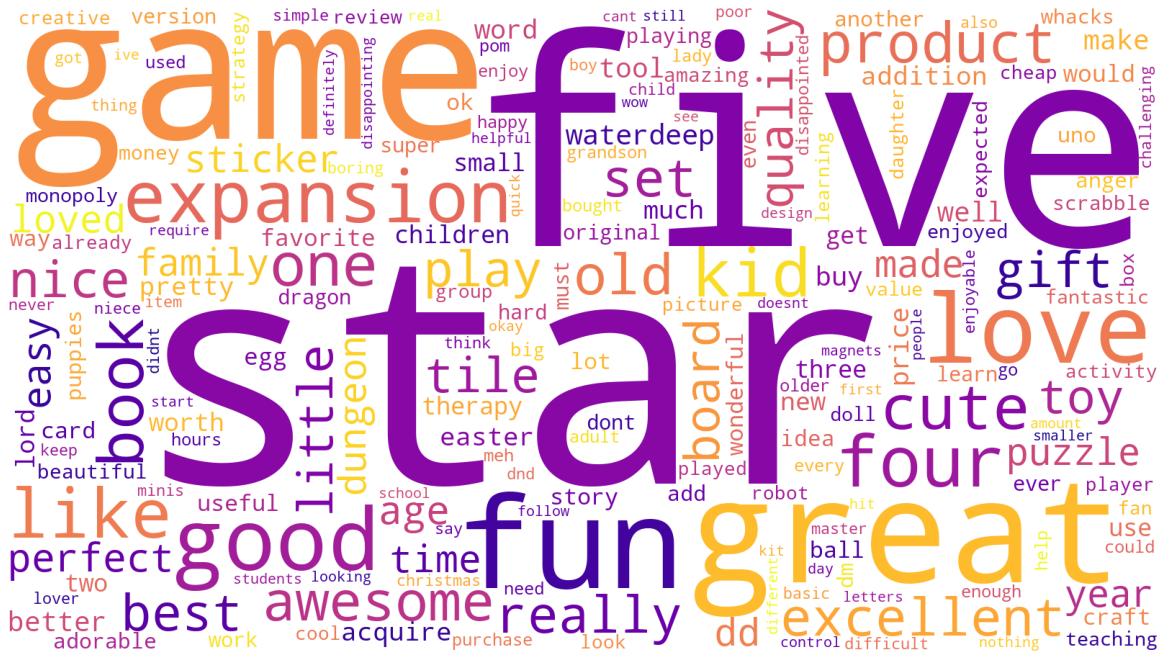

In [98]:
# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) # sets the figure and calls the size
plt.imshow(word_cloud) 
plt.axis("off") # removes axes
plt.tight_layout(pad = 0)  # removes padding in the jupyter workbook
plt.savefig('wcs.png')
plt.show()

### 4d) Identify 15 most common words and polarity

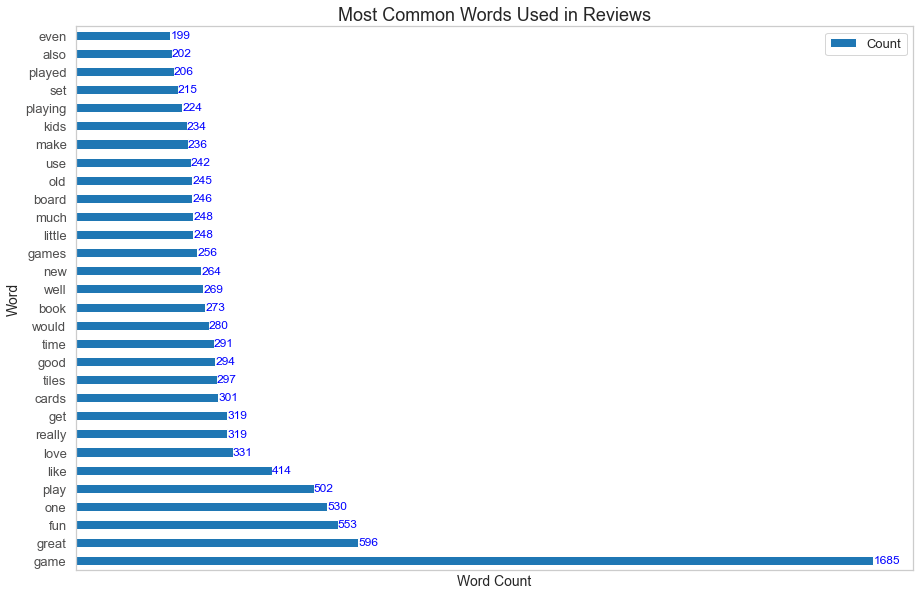

In [99]:
# Determine the 15 most common words.
# Reviews
# put 30 most common words from list into a dataframe
review_count = pd.DataFrame(Counter(reviews_final).most_common(30),
                           columns=['Word', 'Count']).set_index('Word')

# plot as a bar chart
ax = review_count.plot(kind='barh')
ax.set_xlabel('Word Count')
ax.set_ylabel('Word')
ax.set_title('Most Common Words Used in Reviews')
ax.axes.xaxis.set_ticks([])
plt.grid(b=None)
for i in ax.patches:
    ax.text(i.get_width()+0.41, i.get_y()+0.1, str(round((i.get_width()),
                                                        2)), fontsize = 12, color='blue')
plt.show()

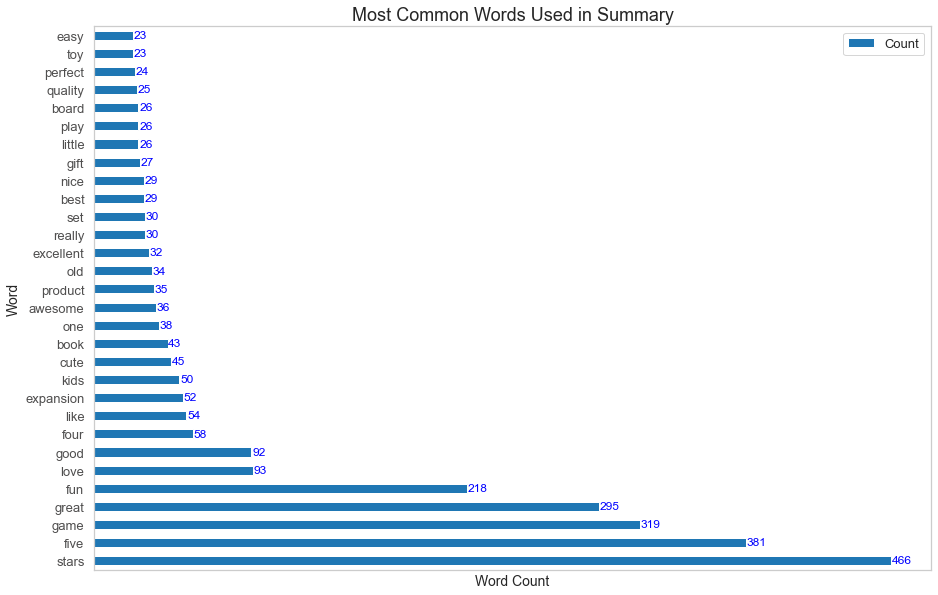

In [100]:
# Determine the 15 most common words.
# Summary
# put 30 most common words from list into a dataframe
review_count = pd.DataFrame(Counter(summary_final).most_common(30),
                           columns=['Word', 'Count']).set_index('Word')

# plot as a bar chart
ax = review_count.plot(kind='barh')
ax.set_xlabel('Word Count')
ax.set_ylabel('Word')
ax.set_title('Most Common Words Used in Summary')
ax.axes.xaxis.set_ticks([])
plt.grid(b=None)
for i in ax.patches:
    ax.text(i.get_width()+0.41, i.get_y()+0.1, str(round((i.get_width()),
                                                        2)), fontsize = 12, color='blue')
plt.show()

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [101]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [102]:
# Determine polarity of both columns. 
df5['polarity_review'] = df5['review'].apply(generate_polarity)
df5['polarity_summary'] = df5['summary'].apply(generate_polarity)

# View output.
df5

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1995      the perfect word game for mixed ages with mom   
1996                                          super fun   
1997                                         great game   
1998                                         four stars   
1999                                     love this game   

                                          tokens_review  \
0     [when, it, comes, to, a, dms, screen, the, spa...   
1     [an, open, letter, to, galeforce9, your, unpai...   
2     [nice, art, nice, printing, why, two, panels, ...   
3     [amazing, buy, bought, it, as, a, gift, for, o...   
4     [as, my, review, of, gf9s, previous, screens, ...   
...                                                 ...   
1995  [the, perfect, word, game, for, mixed, ages, w...   
1996  [great, game, did, not, think, i, would, like,...   
1997  [great, game, for, all, keeps, the, mind, nimble]   
1998                                        [fun, game]   
1999  [this, game, is, fun, a, lot, like, scrabble, ...   

                                         tokens_summary  polarity_review  \
0     [the, fact, that, 50, of, this, space, is, was...        -0.036111   
1     [another, worthless, dungeon, masters, screen,...         0.035952   
2                  [pretty, but, also, pretty, useless]         0.116640   
3                                         [five, stars]         0.578788   
4                                         [money, trap]        -0.316667   
...                                                 ...              ...   
1995  [the, perfect, word, game, for, mixed, ages, w...         0.168750   
1996                                       [super, fun]         0.158333   
1997                                      [great, game]         0.200000   
1998                                      [four, stars]        -0.050000   
1999                                 [love, this, game]        -0.095833   

      polarity_summary  
0             0.150000  
1            -0.800000  
2             0.000000  
3             0.000000  
4             0.000000  
...                ...  
1995          0.200000  
1996          0.316667  
1997          0.200000  
1998          0.000000  
1999          0.050000  

[2000 rows x 6 columns]

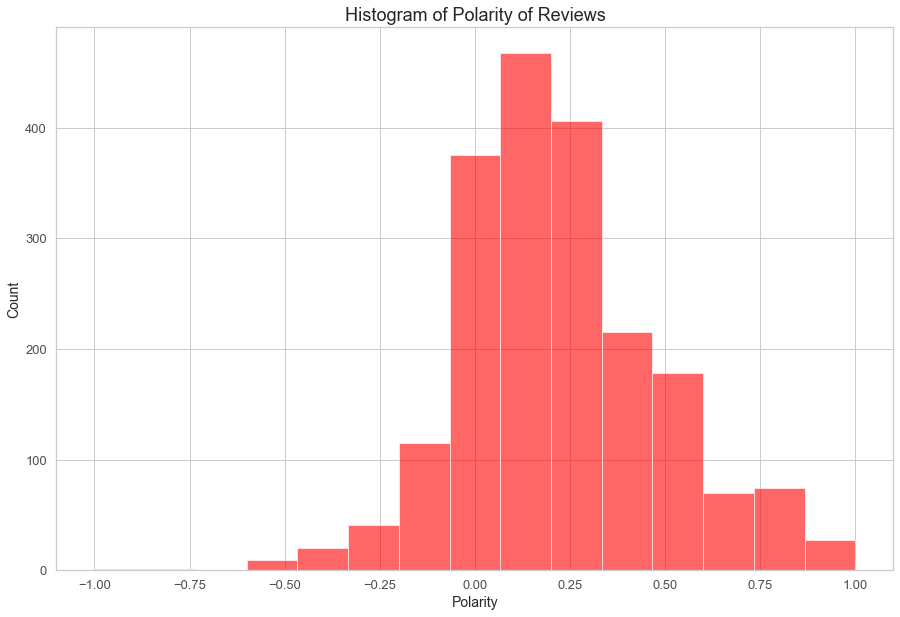

In [103]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.hist(df5['polarity_review'], bins=15, facecolor='red', alpha=0.6)

plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Polarity of Reviews')
plt.show()

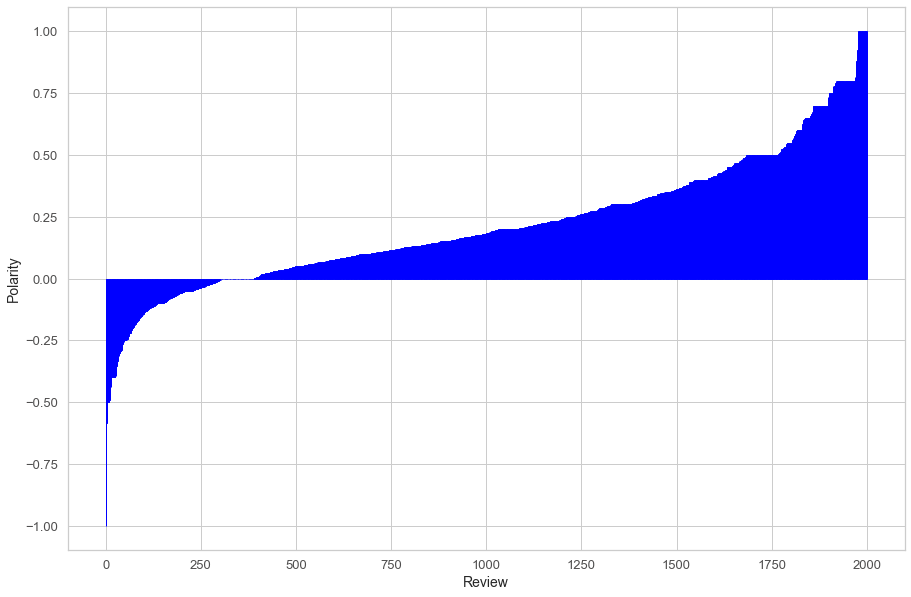

In [104]:
# Another way visualise the general sentiment of the reviews is to plot the score of each review

plt.bar(df5.index,df5['polarity_review'].sort_values(), edgecolor='blue')
plt.xlabel('Review')
plt.ylabel('Polarity')
plt.savefig('polblue.png')
plt.show()


In [105]:
# how many positive reviews versus negative?

print(f"{len(df5[df5['polarity_review']>0])} positive reviews")
print(f"{len(df5[df5['polarity_review']<0])} negative reviews")
print(f"{len(df5[df5['polarity_review']==0])} neutral reviews")
print(f"{df5['polarity_review'].mean()} mean polarity score")
print(f"{df5['polarity_review'].median()} median polarity score")
print(f"{stats.skew(df5['polarity_review'])} Skewness")
print(f"{stats.kurtosis(df5['polarity_review'], fisher = False)} Kurtosis")

1613 positive reviews
306 negative reviews
81 neutral reviews
0.21768844814649288 mean polarity score
0.18225767288267286 median polarity score
0.41794193896718046 Skewness
3.7693889157598375 Kurtosis


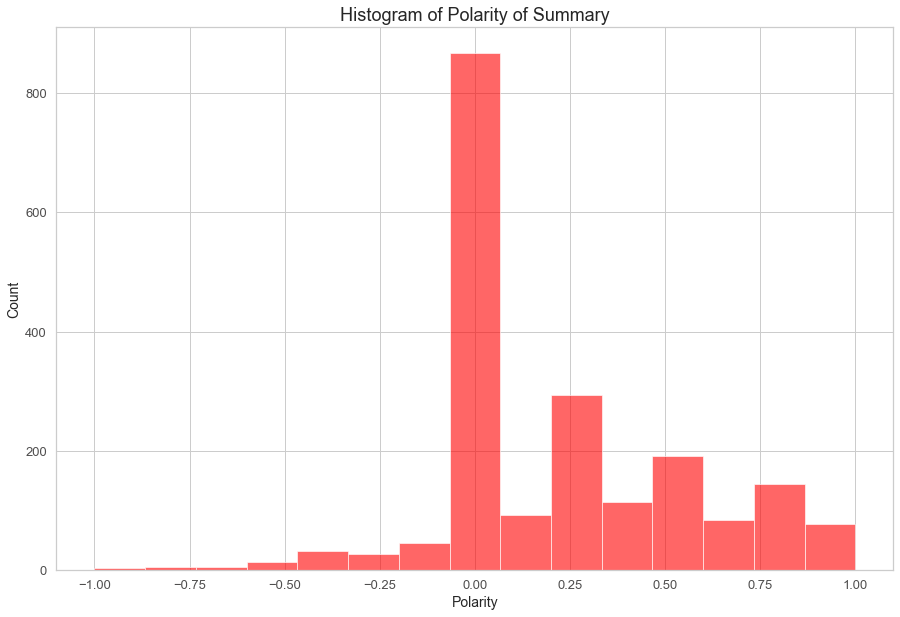

In [106]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.hist(df5['polarity_summary'], bins=15, facecolor='red', alpha=0.6)

plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Polarity of Summary')
plt.show()

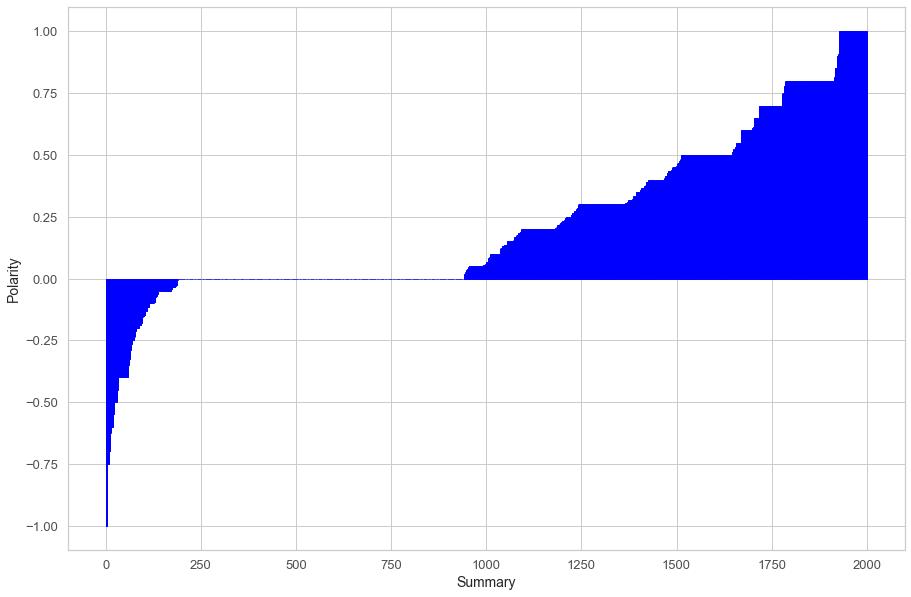

In [107]:
# Another way visualise the general sentiment of the reviews is to plot the score of each review

plt.bar(df5.index,df5['polarity_summary'].sort_values(), edgecolor='blue')
plt.xlabel('Summary')
plt.ylabel('Polarity')
plt.show()

In [108]:
# how many positive summaries versus negative?

print(f"{len(df5[df5['polarity_summary']>0])} positive reviews")
print(f"{len(df5[df5['polarity_summary']<0])} negative reviews")
print(f"{len(df5[df5['polarity_summary']==0])} neutral reviews")
print(f"{df5['polarity_summary'].mean()} mean polarity score")
print(f"{df5['polarity_summary'].median()} median polarity score")
print(f"{stats.skew(df5['polarity_summary'])} Skewness")
print(f"{stats.kurtosis(df5['polarity_summary'], fisher = False)} Kurtosis")

1058 positive reviews
192 negative reviews
750 neutral reviews
0.2193166247294377 mean polarity score
0.0625 median polarity score
0.4635443534982393 Skewness
3.175070603476933 Kurtosis


In [109]:
# Also worth looking at the subjectivity of Reviews and Summary, 0 is objective, 1 subjective.

# Create function for subjectivity.
def generate_subjectivity(comment):
    '''Extract subjectivity score (0 to +1) for each comment'''
    return TextBlob(comment).sentiment[1]

In [110]:
# Determine subjectivity of both columns. 
df5['subjectivity_review'] = df5['review'].apply(generate_subjectivity)
df5['subjectivity_summary'] = df5['summary'].apply(generate_subjectivity)

# View output.
df5

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1995      the perfect word game for mixed ages with mom   
1996                                          super fun   
1997                                         great game   
1998                                         four stars   
1999                                     love this game   

                                          tokens_review  \
0     [when, it, comes, to, a, dms, screen, the, spa...   
1     [an, open, letter, to, galeforce9, your, unpai...   
2     [nice, art, nice, printing, why, two, panels, ...   
3     [amazing, buy, bought, it, as, a, gift, for, o...   
4     [as, my, review, of, gf9s, previous, screens, ...   
...                                                 ...   
1995  [the, perfect, word, game, for, mixed, ages, w...   
1996  [great, game, did, not, think, i, would, like,...   
1997  [great, game, for, all, keeps, the, mind, nimble]   
1998                                        [fun, game]   
1999  [this, game, is, fun, a, lot, like, scrabble, ...   

                                         tokens_summary  polarity_review  \
0     [the, fact, that, 50, of, this, space, is, was...        -0.036111   
1     [another, worthless, dungeon, masters, screen,...         0.035952   
2                  [pretty, but, also, pretty, useless]         0.116640   
3                                         [five, stars]         0.578788   
4                                         [money, trap]        -0.316667   
...                                                 ...              ...   
1995  [the, perfect, word, game, for, mixed, ages, w...         0.168750   
1996                                       [super, fun]         0.158333   
1997                                      [great, game]         0.200000   
1998                                      [four, stars]        -0.050000   
1999                                 [love, this, game]        -0.095833   

      polarity_summary  subjectivity_review  subjectivity_summary  
0             0.150000             0.486111              0.500000  
1            -0.800000             0.442976              0.900000  
2             0.000000             0.430435              0.733333  
3             0.000000             0.784848              0.000000  
4             0.000000             0.316667              0.000000  
...                ...                  ...                   ...  
1995          0.200000             0.491667              0.550000  
1996          0.316667             0.310043              0.433333  
1997          0.200000             0.575000              0.575000  
1998          0.000000             0.300000              0.000000  
1999          0.050000             0.366667              0.500000  

[2000 rows x 8 columns]

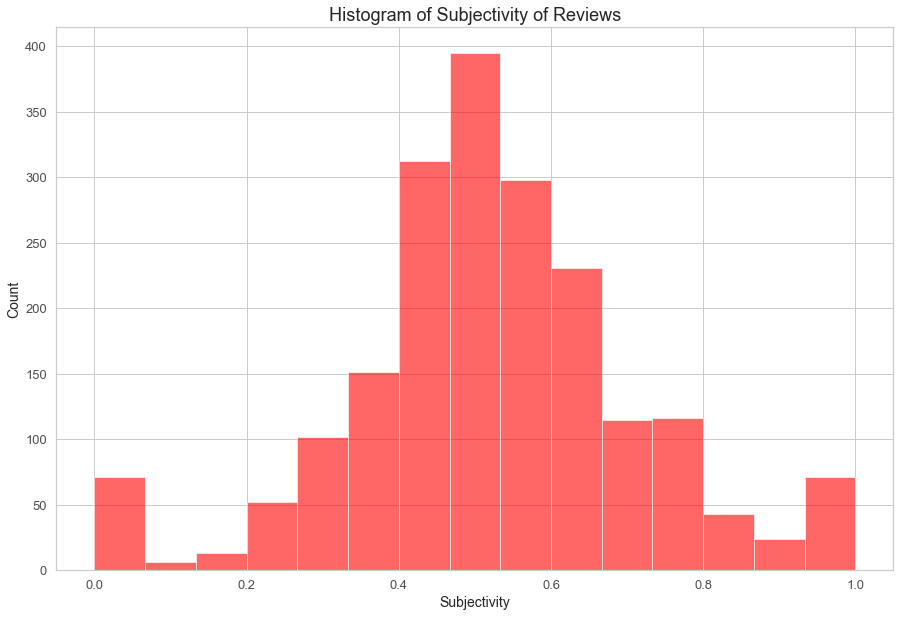

In [111]:
# Review: Create a histogram plot with bins = 15.
# Histogram of subjectivity
plt.hist(df5['subjectivity_review'], bins=15, facecolor='red', alpha=0.6)

plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of Subjectivity of Reviews')
plt.show()

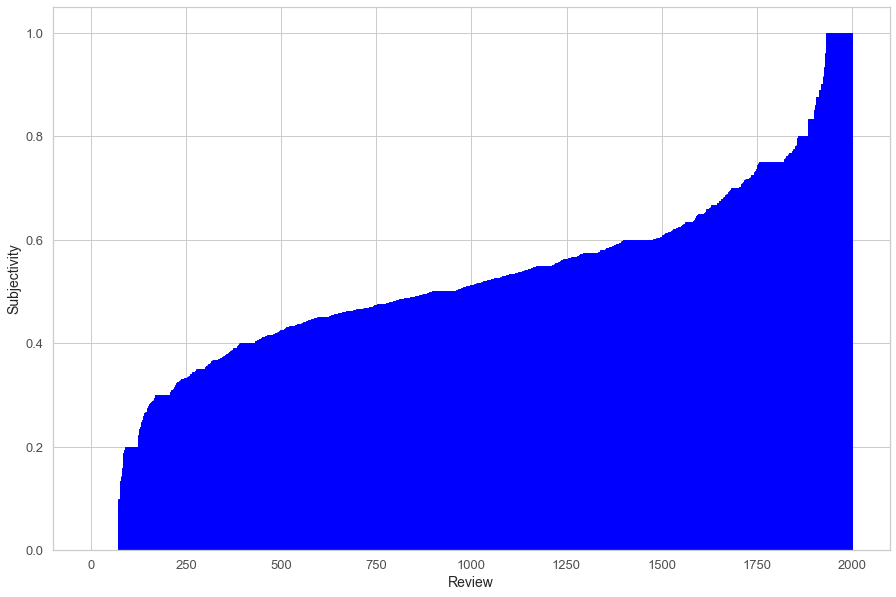

In [112]:
# Another way visualise the general subjectivity of the reviews is to plot the score of each review

plt.bar(df5.index,df5['subjectivity_review'].sort_values(), edgecolor='blue')
plt.xlabel('Review')
plt.ylabel('Subjectivity')
plt.show()


In [113]:
# are reviews more subjective or objective?

print(df5['subjectivity_review'].mean())
print('about in the middle!')

0.5191191523925146
about in the middle!


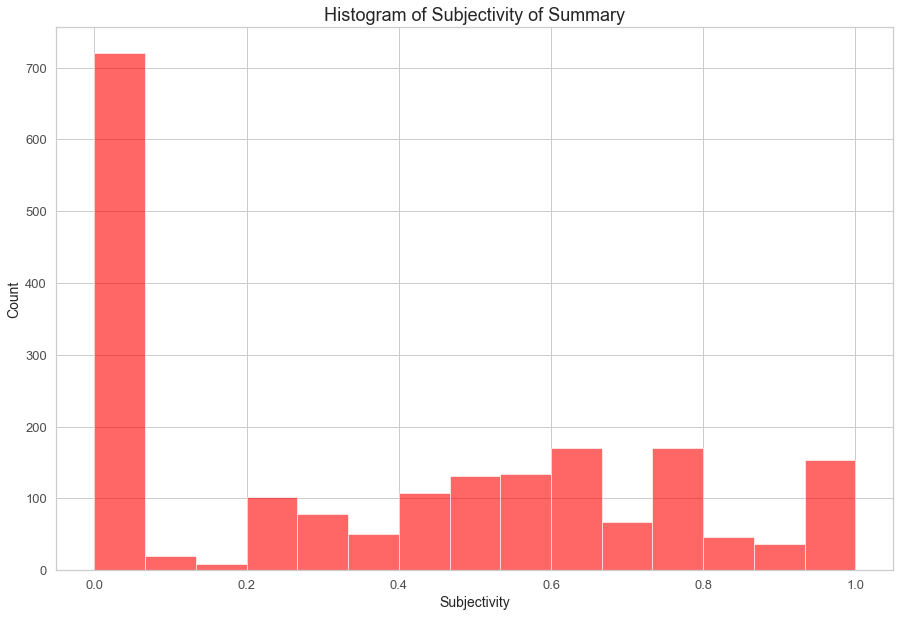

In [114]:
# Review: Create a histogram plot with bins = 15.
# Histogram of subjectivity
plt.hist(df5['subjectivity_summary'], bins=15, facecolor='red', alpha=0.6)

plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of Subjectivity of Summary')
plt.show()

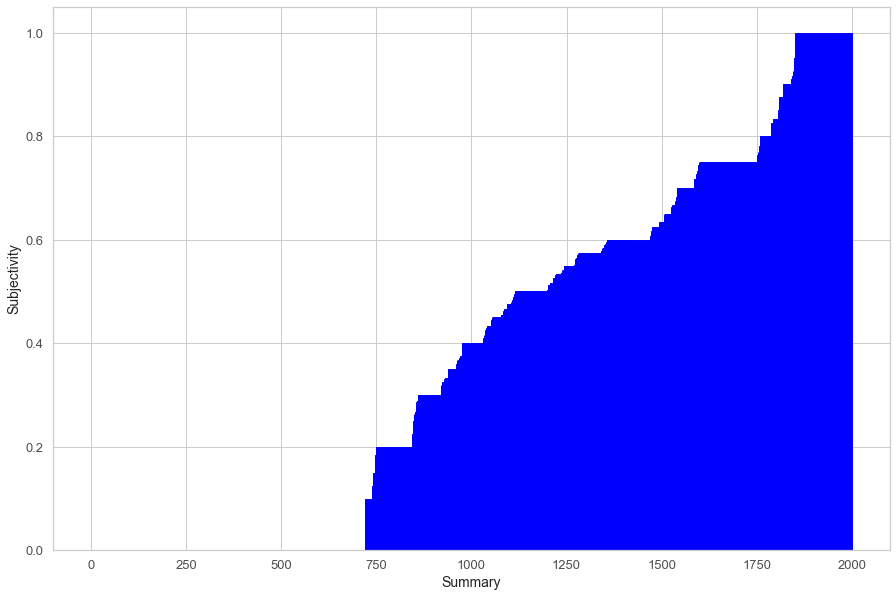

In [115]:
# Another way visualise the general subjectivity of the reviews is to plot the score of each review

plt.bar(df5.index,df5['subjectivity_summary'].sort_values(), edgecolor='blue')
plt.xlabel('Summary')
plt.ylabel('Subjectivity')
plt.show()


In [116]:
# are reviews more subjective or objective?

print(df5['subjectivity_summary'].mean())
print('more objective than subjective')

0.37809555886243473
more objective than subjective


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [117]:
# Top 20 negative reviews.
top_20_negative_reviews = df5.nsmallest(20,'polarity_review')
top_20_negative_reviews = top_20_negative_reviews[['review', 'polarity_review']]

# View output.
# set column width to wider to show full review
pd.set_option('max_colwidth', 500)
top_20_negative_reviews

review  \
208                                                                                                                                                                booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not   
182                                                                                                                                                                                                                                                                                   incomplete kit very disappointing   
1804                                                                                                                                                                                                                                            im sorry i just find this product to be boring and to be frank juvenile   
364                                                                                     one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it   
117                                                                                                                                                                                                           i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift   
227                                                                                                                                                                                                                                                         this was a gift for my daughter i found it difficult to use   
230                                                                                                                                                                                                                                                                                    i found the directions difficult   
290                                                                                                                                                                                                                                                                              instructions are complicated to follow   
301                                                                                                                                                                                                                                                                                                           difficult   
1524                                                                                                                                                                                                                                                                                         expensive for what you get   
174   i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed   
347                                                                                                      my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed   
538                                                                                                                                                             i purchased this on the recommendation of two ther

In [118]:
# Top 20 negative Summaries.
top_20_negative_summary = df5.nsmallest(20,'polarity_summary')
top_20_negative_summary = top_20_negative_summary[['summary', 'polarity_summary']]

# View output.

top_20_negative_summary

summary  \
21                                                  the worst value ive ever seen   
208                              boring unless you are a craft person which i am    
829                                                                        boring   
1166  before this i hated running any rpg campaign dealing with towns because it    
1                        another worthless dungeon masters screen from galeforce9   
144                                                                  disappointed   
631                                                                  disappointed   
793                                                                  disappointed   
1620                                                                 disappointed   
363                            promotes anger instead of teaching calming methods   
885                                      too bad this is not what i was expecting   
890                                                  bad qualityall made of paper   
178                               at age 31 i found these very difficult to make    
101                                                              small and boring   
518                                                                    mad dragon   
805                                                                 disappointing   
1015                                                                disappointing   
1115                                                                disappointing   
1804                                                                disappointing   
1003                     then you will find this board game to be dumb and boring   

      polarity_summary  
21           -1.000000  
208          -1.000000  
829          -1.000000  
1166         -0.900000  
1            -0.800000  
144          -0.750000  
631          -0.750000  
793          -0.750000  
1620         -0.750000  
363          -0.700000  
885          -0.700000  
890          -0.700000  
178          -0.650000  
101          -0.625000  
518          -0.625000  
805          -0.600000  
1015         -0.600000  
1115         -0.600000  
1804         -0.600000  
1003         -0.591667

In [119]:
# Top 20 positive reviews.
top_20_positive_reviews = df5.nlargest(20,'polarity_review')
top_20_positive_reviews = top_20_positive_reviews[['review', 'polarity_review']]

# View output.

top_20_positive_reviews

review  \
7                                                                  came in perfect condition   
165                                                                             awesome book   
194                                                                             awesome gift   
496                                    excellent activity for teaching selfmanagement skills   
524                                                              perfect just what i ordered   
591                                                                        wonderful product   
609                                                                       delightful product   
621                                wonderful for my grandson to learn the resurrection story   
790                                                                                  perfect   
933                                                                                  awesome   
1037                                                                                 awesome   
1135                                                                             awesome set   
1168                                                    best set buy 2 if you have the means   
1177                                                    awesome addition to my rpg gm system   
1301                                                                             its awesome   
1401                                      one of the best board games i played in along time   
1550                                my daughter loves her stickers awesome seller thank you    
1609  this was perfect to go with the 7 bean bags  i just wish they were not separate orders   
1715                                                                             awesome toy   
1720                    it is the best thing to play with and also mind blowing in some ways   

      polarity_review  
7                 1.0  
165               1.0  
194               1.0  
496               1.0  
524               1.0  
591               1.0  
609               1.0  
621               1.0  
790               1.0  
933               1.0  
1037              1.0  
1135              1.0  
1168              1.0  
1177              1.0  
1301              1.0  
1401              1.0  
1550              1.0  
1609              1.0  
1715              1.0  
1720              1.0

In [120]:
# Top 20 positive summaries.
top_20_positive_summary = df5.nlargest(20,'polarity_summary')
top_20_positive_summary = top_20_positive_summary[['summary', 'polarity_summary']]

# View output.

top_20_positive_summary

summary  polarity_summary
6                                        best gm screen ever               1.0
28                                         wonderful designs               1.0
32                                                   perfect               1.0
80   theyre the perfect size to keep in the car or a diaper                1.0
134                                  perfect for preschooler               1.0
140                   awesome sticker activity for the price               1.0
161                                             awesome book               1.0
163                          he was very happy with his gift               1.0
187                                                  awesome               1.0
210                 awesome and welldesigned for 9 year olds               1.0
418                                                  perfect               1.0
475                                                excellent               1.0
543                                                excellent               1.0
548                                   excellent therapy tool               1.0
580   the pigeon is the perfect addition to a school library               1.0
599                                best easter teaching tool               1.0
647                                                wonderful               1.0
651                    all f the mudpuppy toys are wonderful               1.0
657                                           awesome puzzle               1.0
662                                     not the best quality               1.0

## 7. Discuss: Insights and observations

__Review wordcloud__ – most occurring word is unsurprisingly game given that’s what Turtle sell. Other than that some good positive words – fun, great, love, like etc indicating a probably positive sentiment

__Summary wordcloud__ – again game is quite prevalent, but so too positive words like five, great and star dominate.

__Review Polarity Histogram__ – this histogram is right/positively skewed with the more data to the right hand side, and therefore more positive sentiment. It is also leptokurtic, having heavier tails and a lot of the polarity scores are close to the median but a few outliers and extreme values. Mean sentiment is positive and there are a lot more positive sentiment reviews than negative. Thought the negative sentiment reviews are stronger in polarity (see blue chart).

__Summary Polarity Histogram__ - this histogram is right/positively skewed with the more data to the right hand side, and therefore more positive sentiment. It is slightly leptokurtic. Mean sentiment is positive and there are a lot more positive sentiment summaries than negative, but many more neutral than reviews. Though the negative sentiment summaries are again stronger in polarity (see blue chart).

__Subjectivity__ – Reviews are generally shown to be broadly in the middle of the subjectivity/objectivity scale, whereas summaries are more objective – perhaps people get to the point in the summaries as have to be more concise?

__Top 20 negative reviews/summaries__ – when we look at some of the reviews marked negative, they look to be incorrectly scored. Eg. “my son loves playing this game it was recommended by a counselor at school that works with him” gets -0.4. not sure what is negative there? A lot of the reviews are mentioning difficult or complicated so that could be an area to look at. Summaries generally say disappointing, potentially some products are promising more than they deliver?

__Top 20 Positive reviews/summaries__ – look to be scored correctly, no common theme in the comments.

__Further Analysis__ – Use vadersentiment on the data and compare – particularly on the items that look mislabelled. Could do further research and interactions with negative reviewers to help understand issues and fix to ensure customer engagement is good. The review data comes with a product code, link to sales data to see how the most positive/negative reviewed products sell.


## 8. Additional Analysis to Feed into Clustering

I think it would be interesting to see if any of the clusters identified have anything in common with regards to the review comments being positive or negative.

to do this i need to merge some of the dataframes previously created.

In [121]:
# append clustering back to original dataframe
kmeanscol = x[["K-Means Predicted", 'remuneration', 'spending_score']]

df6 = df5.join(kmeanscol)

df6

review  \
0                                                                                                     when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely   
1     an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at b...   
2     nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff...   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                          amazing buy bought it as a gift for our new dm and its perfect   
4                                                                                                                                                                                                                                                                                                                                                                         as my review of gf9s previous screens these were completely unnecessary and nearly useless skip them this is the definition of a waste of money   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ...   
1995                                                                                                                                                                                                                                                                                                                                                                                                   the perfect word game for mixed ages with mom perhaps giving a little help to the 7 yr old we ages 80 to 8 love it   
1996                                                                                                                                                                                                                                                                                                                great game did not think i would like it when first received but has turned out to be a lot of fun and we play regularl

In [122]:
# define function to label polarity as pos, neu, neg
def label(x):
    if x > 0:
        return 'positive'
    elif x == 0:
        return 'neutral'
    else:
        return 'negative'

In [123]:
# create column with the polarity labelled
df6['review_sentiment'] = df6['polarity_review'].apply(label)

In [124]:
# check df
df6

review  \
0                                                                                                     when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely   
1     an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at b...   
2     nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff...   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                          amazing buy bought it as a gift for our new dm and its perfect   
4                                                                                                                                                                                                                                                                                                                                                                         as my review of gf9s previous screens these were completely unnecessary and nearly useless skip them this is the definition of a waste of money   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ...   
1995                                                                                                                                                                                                                                                                                                                                                                                                   the perfect word game for mixed ages with mom perhaps giving a little help to the 7 yr old we ages 80 to 8 love it   
1996                                                                                                                                                                                                                                                                                                                great game did not think i would like it when first received but has turned out to be a lot of fun and we play regularl

In [125]:
# show total reviews by cluster and polarity
df7 = df6.groupby(by=['K-Means Predicted', 'review_sentiment'], as_index=False).count()
df8 = df7[['K-Means Predicted', 'review_sentiment', 'review']]
df8

K-Means Predicted review_sentiment  review
0                   0         negative      52
1                   0          neutral      18
2                   0         positive     286
3                   1         negative     121
4                   1          neutral      30
5                   1         positive     623
6                   2         negative      51
7                   2          neutral       7
8                   2         positive     272
9                   3         negative      39
10                  3          neutral      11
11                  3         positive     219
12                  4         negative      43
13                  4          neutral      15
14                  4         positive     213

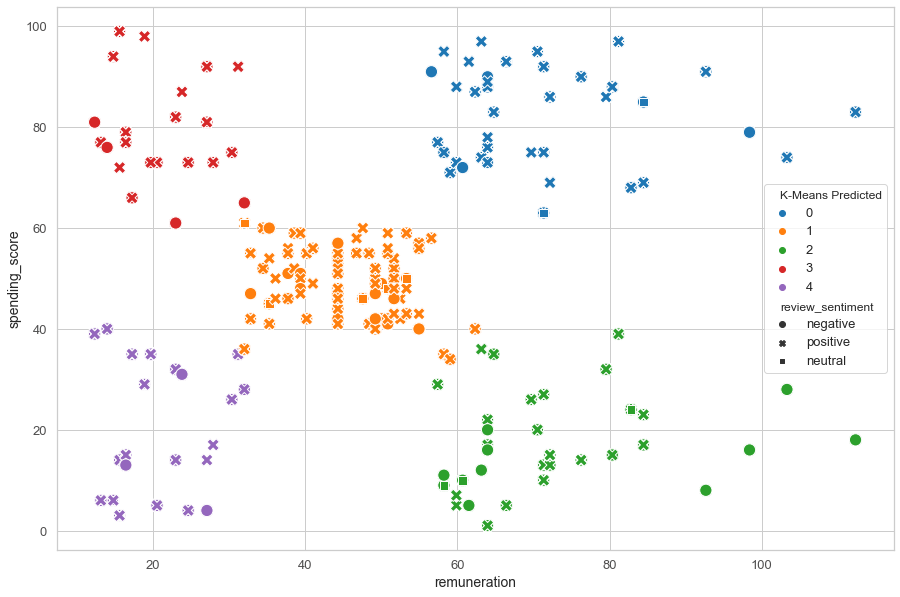

In [126]:
# plot
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df6 , hue='K-Means Predicted',
                palette="tab10", style= 'review_sentiment',
                s=150)
plt.savefig('KMSent.png')

Based on the plot and the table, there is no huge difference between the clusters when looking at review sentiment. All are broadly 80% positive, 15% negative and 5% neutral and representative of the sample as a whole. Therefore there is no insight here to say that a certain cluster my be more predisposed to leave a positive or negative review than the other (but it was fun to make).

# 